# CB AIML - Deep Learning with Keras and TensorFlow
# Project 2 : Traffic Signs Recognition

## DESCRIPTION

Self-driving cars are the future as people can entirely depend on the car for traveling.

In the world of AI, many researchers and big companies like Tesla, Google, Mercedes-Benz, Toyota, Ford, and Audi are working on self-driving vehicles and cars. To achieve accuracy with this technology, vehicles need to understand and follow the traffic rules accordingly.

There are many types of traffic signs, such as no parking, speed limit, no-entry, turn left or right, school ahead, no honking, and so on.

## Objective: 

To create a model that can accurately distinguish between distinct traffic signals from photos using a Convolutional Neural Network

## Dataset Details: 

The dataset contains three folders and two Excel files, which are:

* **Train folder:** This folder has a subfolder with a class label as its name, and the sub-folder has images related to the class that can be used for training the model.

* **Test folder:** It has 12631 images that should be used to evaluate the model.

* **Sample images for classes:** It has one image of each class in high definition for illustration purposes.

* **Train_data_label Excel file:** This file has the class Id of all the images in the train folder along with its path.

* **Test_data_label Excel file:** It has the path/name of the images in the test folder along with its class label.

**There are more than 50000 images of 43 traffic signs, which are:**  
**0:** Speed limit (20km/h)  
**1:** Speed limit (30km/h)   
**2:** Speed limit (50km/h)   
**3:** Speed limit (60km/h)     
**4:** Speed limit (70km/h)   
**5:** Speed limit (80km/h)   
**6:** End of speed limit (80km/h)   
**7:** Speed limit (100km/h)   
**8:** Speed limit (120km/h)   
**9:** No passing   
**10:** No passing vehicle over 3.5 tons   
**11:** Right-of-way at the intersection   
**12:** Priority road   
**13:** Yield   
**14:** Stop   
**15:** No vehicles   
**16:** Vehicle > 3.5 tons prohibited   
**17:** No entry   
**18:** General caution   
**19:** Dangerous curve left   
**20:** Dangerous curve right   
**21:** Double curve   
**22:** Bumpy road   
**23:** Slippery road   
**24:** Road narrows on the right   
**25:** Road work   
**26:** Traffic signals   
**27:** Pedestrians   
**28:** Children crossing   
**29:** Bicycles crossing   
**30:** Beware of ice/snow  
**31:** Wild animals crossing   
**32:** End speed + passing limits   
**33:** Turn right ahead   
**34:** Turn left ahead   
**35:** Ahead only   
**36:** Go straight or right   
**37:** Go straight or left   
**38:** Keep right   
**39:** Keep left   
**40:** Roundabout mandatory   
**41:** End of no passing   
**42:** End no passing vehicle > 3.5 tons 

**Steps to be followed:** 

* Import the required libraries

* Read the Train_data_label Excel file

* Read the images in the train folder and resize them to 30 X 30

* Create a NumPy array from the resized images

* As the image is still in RGB format, it can be converted to grayscale

* For the other columns in the data, save the image's color image array in a new column named color_img_arr

* For the other columns in the data, save the grayscale image array of images in a new column named grayscale_img_arr

* Plot the bar chart of classes from the train and test data by replacing the numbers with actual class names in the graph

* Prepare the model's training and testing data, as well as convert the labels and data to the format or shape required by the model

 

**Create two CNN models, one with color images and the other with greyscale images, using the following steps:**   

 

**Note:** use Keras library

 

* Add Convolutional, MaxPool, and DropoutLayers

* Use Relu as an activation function

* Take the loss function as binary cross-entropy

* Take Adam as an optimizer

* Use early-stop with two patients and monitor for validation loss

* Experiment with the five epochs

* Refine the CNN model color images until an accuracy of 90% or more is achieved by different filter shapes, neurons, activation functions, optimizers, and architecture

* Plot the training and validation accuracy for color and grayscale models

* Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model's classes are good 

* Compare the color and grayscale CNN models and analyze which model is better

 

**You can download the datasets from the Course Resource (Self-learning tab)** 

## Explore the Data 
<font size="3.5">The dataset containing the three folders (`Train`, `Test` and `Sample images for Classes`) and the two Excel files (`Train_data_label.xlsx` and `Test_data_label.xlsx`) are organized in the `data` folder.</font>

<font size="3.5">Let's check the content in the folders</font>

In [1]:
import os

# Track count of images in 'data/Train/*' subfolders
train_image_count = 0 

# Walk through data directory and list number of files in it
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

    # Keep count of images in the 'data/Train/*' directories
    if 'data/Train/' in dirpath:
        train_image_count += len(filenames)
        
print(f"\nThere are a total of {train_image_count} images in 'Train' dataset.")


There are 3 directories and 3 images in 'data'.
There are 0 directories and 12631 images in 'data/Test'.
There are 0 directories and 43 images in 'data/Sample images for Classes'.
There are 43 directories and 1 images in 'data/Train'.
There are 0 directories and 240 images in 'data/Train/32'.
There are 0 directories and 1200 images in 'data/Train/35'.
There are 0 directories and 420 images in 'data/Train/34'.
There are 0 directories and 689 images in 'data/Train/33'.
There are 0 directories and 360 images in 'data/Train/20'.
There are 0 directories and 1200 images in 'data/Train/18'.
There are 0 directories and 240 images in 'data/Train/27'.
There are 0 directories and 1470 images in 'data/Train/9'.
There are 0 directories and 210 images in 'data/Train/0'.
There are 0 directories and 1320 images in 'data/Train/11'.
There are 0 directories and 1440 images in 'data/Train/7'.
There are 0 directories and 270 images in 'data/Train/29'.
There are 0 directories and 420 images in 'data/Train/1

In [2]:
# Let's change the directory before proceeding
os.chdir('data')


In [3]:
# List the files in the current working directory
!ls


Sample images for Classes Test_data_label.xlsx      Train_data_label.xlsx
Test                      Train


In [4]:
# Check if there are any files other than '*.png' in Test directory
!find Test ! -name '*.png'


Test
Test/GT-final_test.csv


In [5]:
# List the files in the 'Sample images for Classes' directory
!ls 'Sample images for Classes'


0.png  12.png 16.png 2.png  23.png 27.png 30.png 34.png 38.png 41.png 7.png
1.png  13.png 17.png 20.png 24.png 28.png 31.png 35.png 39.png 42.png 8.png
10.png 14.png 18.png 21.png 25.png 29.png 32.png 36.png 4.png  5.png  9.png
11.png 15.png 19.png 22.png 26.png 3.png  33.png 37.png 40.png 6.png


### Data Summary

The dataset downloaded from the Course Resource are orgainized in the `data` directory.

There are 3 directories (`'Sample images for Classes'`, `Test`, `Train`) and 2 Excel files (`Test_data_label.xlsx` and `Train_data_label.xlsx` in the `data` directory.

There are 43 image files in the `'Sample images for Classes'` subdirectory with each depicting one of the 43 traffic signs (0~42.png).

There are 12,630 image files and 1 CSV file under the `Test` subdirectory.

There are a total of 39,209 image files in the `Train` subdirectories (each subdirectory under the `Train` folder are storing the 0 ~ 42 corresponding traffic sign image files according to the subdirectories label. For example, subdirectory `Train/0/` stores the `'Speed limit (20km/h)'` traffic sign image filesa as is described in the `'Dataset Details'` above.

According to the information provided under the `'Dataset Details'` , there are 43 types of traffic sign in the more than 50,000 images provided.

There are 43 sub-directories (numbered from 0 to 42) under the `Train` folder corresponding with these 43 traffic signs. 

Let's create a list of class name for the 43 traffic signs provided. 

### Create the numerical class `labels` and corresponding `classname` list of traffic signs

In [6]:
# The 43 unique traffic signs in the datasets [0 - 42]
classname = ['Speed limit (20km/h)',              #  0 
             'Speed limit (30km/h)',              #  1
             'Speed limit (50km/h)',              #  2
             'Speed limit (60km/h)',              #  3
             'Speed limit (70km/h)',              #  4
             'Speed limit (80km/h)',              #  5
             'End of speed limit (80km/h)',       #  6
             'Speed limit (100km/h)',             #  7
             'Speed limit (120km/h)',             #  8
             'No passing',                        #  9
             'No passing vehicle over 3.5 tons',  # 10
             'Right-of-way at the intersection',  # 11
             'Priority road',                     # 12
             'Yield',                             # 13 
             'Stop',                              # 14
             'No vehicles',                       # 15
             'Vehicle > 3.5 tons prohibited',     # 16
             'No entry',                          # 17
             'General caution',                   # 18
             'Dangerous curve left',              # 19
             'Dangerous curve right',             # 20
             'Double curve',                      # 21 
             'Bumpy road',                        # 22
             'Slippery road',                     # 23
             'Road narrows on the right',         # 24
             'Road work',                         # 25
             'Traffic signals',                   # 26
             'Pedestrians',                       # 27
             'Children crossing',                 # 28
             'Bicycles crossing',                 # 29
             'Beware of ice/snow',                # 30
             'Wild animals crossing',             # 31
             'End speed + passing limits',        # 32
             'Turn right ahead',                  # 33
             'Turn left ahead',                   # 34
             'Ahead only',                        # 35
             'Go straight or right',              # 36
             'Go straight or left',               # 37
             'Keep right',                        # 38
             'Keep left',                         # 39
             'Roundabout mandatory',              # 40
             'End of no passing',                 # 41
             'End no passing vehicle > 3.5 tons'] # 42


### Import the required Libraries

In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Import modules from sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Import modules from tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


### Read in the Excel files

In [8]:
# Read in the 'Train_data_label' Excel file
train_data = pd.read_excel('Train_data_label.xlsx')
train_data.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [9]:
# Read in the 'Test_data_label' Excel file
test_data = pd.read_excel('Test_data_label.xlsx')
test_data.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [10]:
# Show the shape (size) of the 'train_data' and 'test_data' DataFrames
train_data.shape, test_data.shape


((39209, 2), (12630, 2))

There are 39,209 images in the `Train` dataset and 12,630 images in the `Test` dataset.  
    
It looks like the `ClassId` in the `Train` dataset corresponds with the `Train` subfolder the images are saved in. The unique `ClassId` can be considered as the `class labels` for the dataset. The ordered `class labels` (subdirectories under the `Train` folder) corresponds with the list index of the `class names` as listed in the `classname` list above.

In [11]:
# Numerical traffic sign classes (0 ~ 42) representing the type of traffic signs
labels = np.sort(train_data['ClassId'].unique())
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

### Read the images in and resize them to 30 X 30

Let's first test the functionality for the required steps with the files in `Sample images for Classes` directory

1. Read the file in using `tf.io.read_file()` from the specified file path
2. Decode the image into numerical Tensor in RGB format (channels=3)
3. Convert (rescale) the image from RGB channel 0-255 to 0-1
4. Resize the image
5. Display the image

You can specify any image number in the code below to view the differnt images in the `Sample images for Classes` folder. The image will be plotted with the class name and shape.

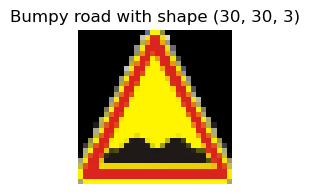

In [12]:
# Process to test functionality to read in and convert image file from 'Sample images for Classes' directory
IMG_NUM = 22   # image number (0 ~ 42)

# Read in the specified IMG_NUM image file from the file path
img_raw = tf.io.read_file('Sample images for Classes/'+str(IMG_NUM)+'.png')  
img = tf.io.decode_image(img_raw, channels=3)         # Get the image in RBG format (channel=3)
img = tf.image.convert_image_dtype(img, tf.float32)   # Convert (rescale) the image from 0-255 to 0-1 
img = tf.image.resize(img, [30,30])                   # Resize the image to 30 x 30

# Visualize the image
plt.figure(figsize=(2, 2))
plt.title(f"{classname[IMG_NUM]} with shape {img.shape}")  # Image class name with shape of image
plt.axis(False)   # Remove the axis ticks
plt.imshow(img);


### Create a NumPy array from the resized image

The image (img) above had been converted into a tensor. The tensor contains the NumPy array of the resized image. 

The values of the NumPy array had been rescaled to between 0 and 1 of float32 data type.

To get the NumPy array from the Tensor, use: `img.numpy()`

The Tensor is displayed below:

In [13]:
# Display the Tensor containing the NumPy array and the resized shape
img


<tf.Tensor: shape=(30, 30, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.9912855 , 0.9346405 , 0.00457518],
        [0.8549

### Convert the RGB image to grayscale  
As the image is still in RGB format, it can be converted to grayscale. 

Convert the RGB image into grayscale image and display it without and with the cmap set to `'gray'`.

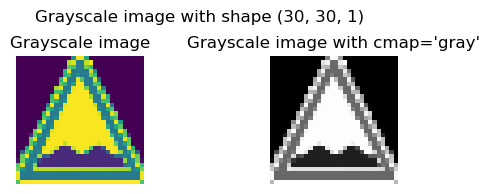

In [14]:
grayscale_img = tf.image.rgb_to_grayscale(img)   # Convert RGB image to grayscale

# Set up to plot 2 grayscale images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
plt.suptitle("Grayscale image with shape {}".format(grayscale_img.shape))
plt.subplots_adjust(top=0.75)

# Display purely grayscale image
ax1.set_title("Grayscale image")                  
ax1.axis(False)
ax1.imshow(grayscale_img)

# Display grayscale image with cmap set to 'gray'
ax2.set_title("Grayscale image with cmap='gray'") 
ax2.axis(False)
ax2.imshow(grayscale_img, cmap='gray');


### Create a function to preprocess the image - read in the image,  resize it and turn it into a `NumPy array`

TensorFlow only works with numerical values. So, let's create a function to preprocess the image and turn it into a tensor (containing the NumPy array and shape of the image). Then return the `NumPy array` from the tensor for saving to the DataFrames. 

<font size="3">**Create the function to preprocess the image:**</font>
1. Read in an image file from the specified file path
2. Decode the image into numerical Tensor in RGB format
3. Rescale the image color channel values from 0-255 to 0-1 values
4. Resize the image to the desired size (30 x 30)
5. Return the `NumPy array` from the preprocessed tensor image

In [15]:
# Define an image size
IMG_SIZE = 30

# Function to preprocess image
def process_image(image_path, image_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor. 
    Decode, rescale and resize the tensor image.
    Return the NumPy array from the tensor.
    """
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Decode the image into numerical Tensor in RGB format (3 color channels [Read, Green, Blue])
    image = tf.image.decode_image(image, channels=3)
    # Convert/rescale the color channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to the desired value
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    
    # Return the NumPy array from the processed tensor image
    return image.numpy()


### Add a new column named `color_img_arr` to save the color image array

* Get the file path for each image from the DataFrame and use the `process_image()` function to convert the image to a `NumPy array`.
* The file path for each of the `Train` and `Test` datasets can be found in the `Path` columns of its corresponding DataFrames.
* Save the image's color image array to a new column named `color_img_arr`
* Display the first 5 rows of the DataFrame to verify the column had been added.

In [16]:
# Use process_image() to get the NumPy array from the specified file 'Path' to save in new column 'color_img_arr'

train_data['color_img_arr'] = [process_image(path, IMG_SIZE) for path in train_data['Path']]
train_data.head()

,ClassId,Path,color_img_arr
0,20,Train/20/00020_00000_00000.png,"[[[0.18039216, 0.20000002, 0.21960786], [0.187..."
1,20,Train/20/00020_00000_00001.png,"[[[0.18431373, 0.19607845, 0.21568629], [0.191..."
2,20,Train/20/00020_00000_00002.png,"[[[0.20000002, 0.19607845, 0.22352943], [0.200..."
3,20,Train/20/00020_00000_00003.png,"[[[0.19215688, 0.19215688, 0.21176472], [0.192..."
4,20,Train/20/00020_00000_00004.png,"[[[0.19607845, 0.19607845, 0.21568629], [0.199..."


### Create a function to display the image

To verify that the saved `color_img_arr` NumPy array actually stored the image, let's create a function to display the image from any specified rows from the DataFrame.

<font size="3">**Create the `show_image` function**</font>
1. Get the `NumPy array` image from the specified `DataFrame` according to the specified `row` and column name (`img_array`).
2. Set the image title to show the `name of the traffic sign` and the `image shape` for the selected image.
4. Display the image according to whether the `NumPy array` was saved as a `color` or `gray` image.

Use the function to display the image from the selected row and column of the DataFrame to verify that the saved `NumPy array` is a valid image.

In [17]:
# Function to visualize an image
def show_image(df=train_data, row=0, img_array='color_img_arr', img_name=classname):
    """
    Display the image specified in the row and columnn name (img_array) of 
    the specified DataFrame (df). Pass in a list of image name if needed.
    """
    # Get the NumPy array from the row and column in the DataFrame
    numpy_array = df.loc[row, img_array]
    # Convert the NumPy array to a tensor image array
    img = tf.convert_to_tensor(numpy_array)
    
    # Set the figure size to be (2, 2)
    plt.figure(figsize=(2, 2))
    # Display title as image class name with shape of image
    plt.title(f"{img_name[df.loc[row, 'ClassId']]} with shape {img.shape}")
    # Remove the axis ticks
    plt.axis(False)   
    
    # Show the image with the title
    if 'gray' in img_array:         # if grayscale image, show with cmap set to 'gray'
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img);
        

In [18]:
# Print a few rows of the 'train_data` to show the 'ClassId' and 'Path' for use in verifying the image 

print(train_data.iloc[359:361, :2])
print(train_data.iloc[569:571, :2])


     ClassId                            Path
359       20  Train/20/00020_00011_00029.png
360        0   Train/0/00000_00000_00000.png
     ClassId                           Path
569        0  Train/0/00000_00006_00029.png
570        1  Train/1/00001_00000_00000.png


Row 359 has 'ClassId' 20, rows 360 to 569 has 'ClassId' 0, and row 570 has 'ClassId' 1.

Let's display traffic sign in row 370 from the `train_data`.  

You can change the row number to display other images.  

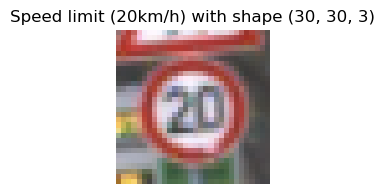

In [19]:
# Show the image according to the DataFrame, row number and column name of image array specified

show_image(df=train_data, row=370, img_array='color_img_arr')

### Add a new column named `grayscale_img_arr` to save the grayscale image array

* Convert the `color` image into a `grayscale` image.
* Save the grayscale image array of images to a new column named `grayscale_img_arr`
* Display the first 5 rows of the DataFrame to verify the column had been added.

To verify that the saved image is valid, use the `show_image` function to display the `grayscale` image.

In [20]:
# Convert the RGB image to grayscale image and save them to new column 'grayscale_img_arr' as a NumPy array

train_data['grayscale_img_arr'] = [tf.image.rgb_to_grayscale(img).numpy() for img in train_data['color_img_arr']]
train_data.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,20,Train/20/00020_00000_00000.png,"[[[0.18039216, 0.20000002, 0.21960786], [0.187...","[[[0.19635452], [0.1983472], [0.1997865], [0.2..."
1,20,Train/20/00020_00000_00001.png,"[[[0.18431373, 0.19607845, 0.21568629], [0.191...","[[[0.19477767], [0.19688755], [0.19772623], [0..."
2,20,Train/20/00020_00000_00002.png,"[[[0.20000002, 0.19607845, 0.22352943], [0.200...","[[[0.20036042], [0.20382139], [0.20169966], [0..."
3,20,Train/20/00020_00000_00003.png,"[[[0.19215688, 0.19215688, 0.21176472], [0.192...","[[[0.19437297], [0.19684708], [0.19614519], [0..."
4,20,Train/20/00020_00000_00004.png,"[[[0.19607845, 0.19607845, 0.21568629], [0.199...","[[[0.19829415], [0.19975144], [0.19724996], [0..."


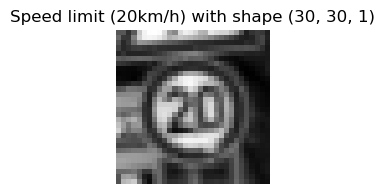

In [21]:
# Display the grayscale image from the specified row in the DataFrame

show_image(df=train_data, row=370, img_array='grayscale_img_arr')


### Do the same with the `Test` dataset...convert and save the images as color and grayscale NumPy array
Similarly, process and save the color image's image array and the grayscale image array for the `Test` datasest to the `test_data` DataFrame.

Also, verify that the image array are storing valid image representation by showing one of the image from the `test_data` DataFrame.

In [22]:
# Save color and grayscale image array to its corresponding 'color_img_arr' and 'grayscale_img_arr' columns
# Use process_image() to get the tensor from the specified file 'Path' to save in new column 'color_img_arr'
# Convert the RGB image to grayscale image and save in new column 'grayscale_img_arr'

test_data['color_img_arr'] = [process_image(path, IMG_SIZE) for path in test_data['Path']]
test_data['grayscale_img_arr'] = [tf.image.rgb_to_grayscale(img).numpy() for img in test_data['color_img_arr']]
test_data.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,16,Test/00000.png,"[[[0.45538566, 0.5472157, 0.68477124], [0.4545...","[[[0.5353943], [0.52868736], [0.5347305], [0.5..."
1,1,Test/00001.png,"[[[0.23607844, 0.27803925, 0.2384314], [0.3472...","[[[0.26095405], [0.31582215], [0.32348454], [0..."
2,38,Test/00002.png,"[[[0.20528106, 0.15752943, 0.14899346], [0.199...","[[[0.17081355], [0.16668853], [0.16357705], [0..."
3,33,Test/00003.png,"[[[0.5176471, 0.4901961, 0.34117648], [0.37764...","[[[0.48136395], [0.3420813], [0.27045286], [0...."
4,11,Test/00004.png,"[[[0.1437255, 0.1319608, 0.11627452], [0.16686...","[[[0.13367584], [0.15275812], [0.16279335], [0..."


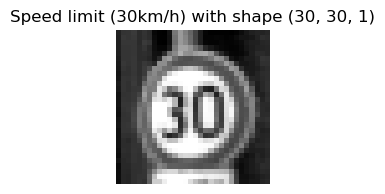

In [23]:
# Show the grayscale image from row 1 in the 'test_data'

show_image(df=test_data, row=1, img_array='grayscale_img_arr')


## Plot the bar chart of classes from the `train` and `test` data

Define a functon to plot a bar chart of the number of class counts versus the classes  
1. Get the count for each traffic sign from the data
2. Replace the class numbers with the actual class names 
3. Plot the bar chart of classes from the data with the number of classes vs. class name

The first chart shows the bar chart of classes for the `train` data.

The second chart shows the bar chart of classes for the `test` data.

In [24]:
# Create function to plot the bar chart
def plot_bar_chart(data, data_label='', classname=classname):
    """
    Plot a bar chart for the count of Traffic Sign Classes from the specified data
    data = DataFrame where the images are stored.
    data_label = User define data label for display (default to blank)
    classname = actual names of the traffic sign class labels
    """
    # Get the count of traffic signs from the data
    sign_counts = data['ClassId'].value_counts()
    
    # Replace the actual class names for the traffic signs class label to use for x-axis
    x = [classname[index] for index in sign_counts.index]
    # Get the number of counts for each of the traffic signs to use for y-axis (height)
    y = sign_counts.values
    
    # Set the figure size and title
    plt.figure(figsize=(20, 10))
    plt.title(f"Bar Chart of Traffic Sign Classes from {data_label} data", 
              fontsize=30, fontweight="bold", y=1.02)  # y is set to add some space between title and chart
    
    # Set x-axis label, rotate x ticks and set fontsize for label and ticks
    plt.xlabel("Traffic Sign Class Name", fontsize=22)
    plt.xticks(rotation=90, fontsize=16)
    
    # Set y-axis label and set the fontsize for label and ticks
    plt.ylabel("Number of Traffic Signs", fontsize=22)
    plt.yticks(fontsize=16)

    # Set the margin and plot the bar chart
    plt.margins(0, 0.02)
    plt.bar(x=x, height=y, width=0.85);


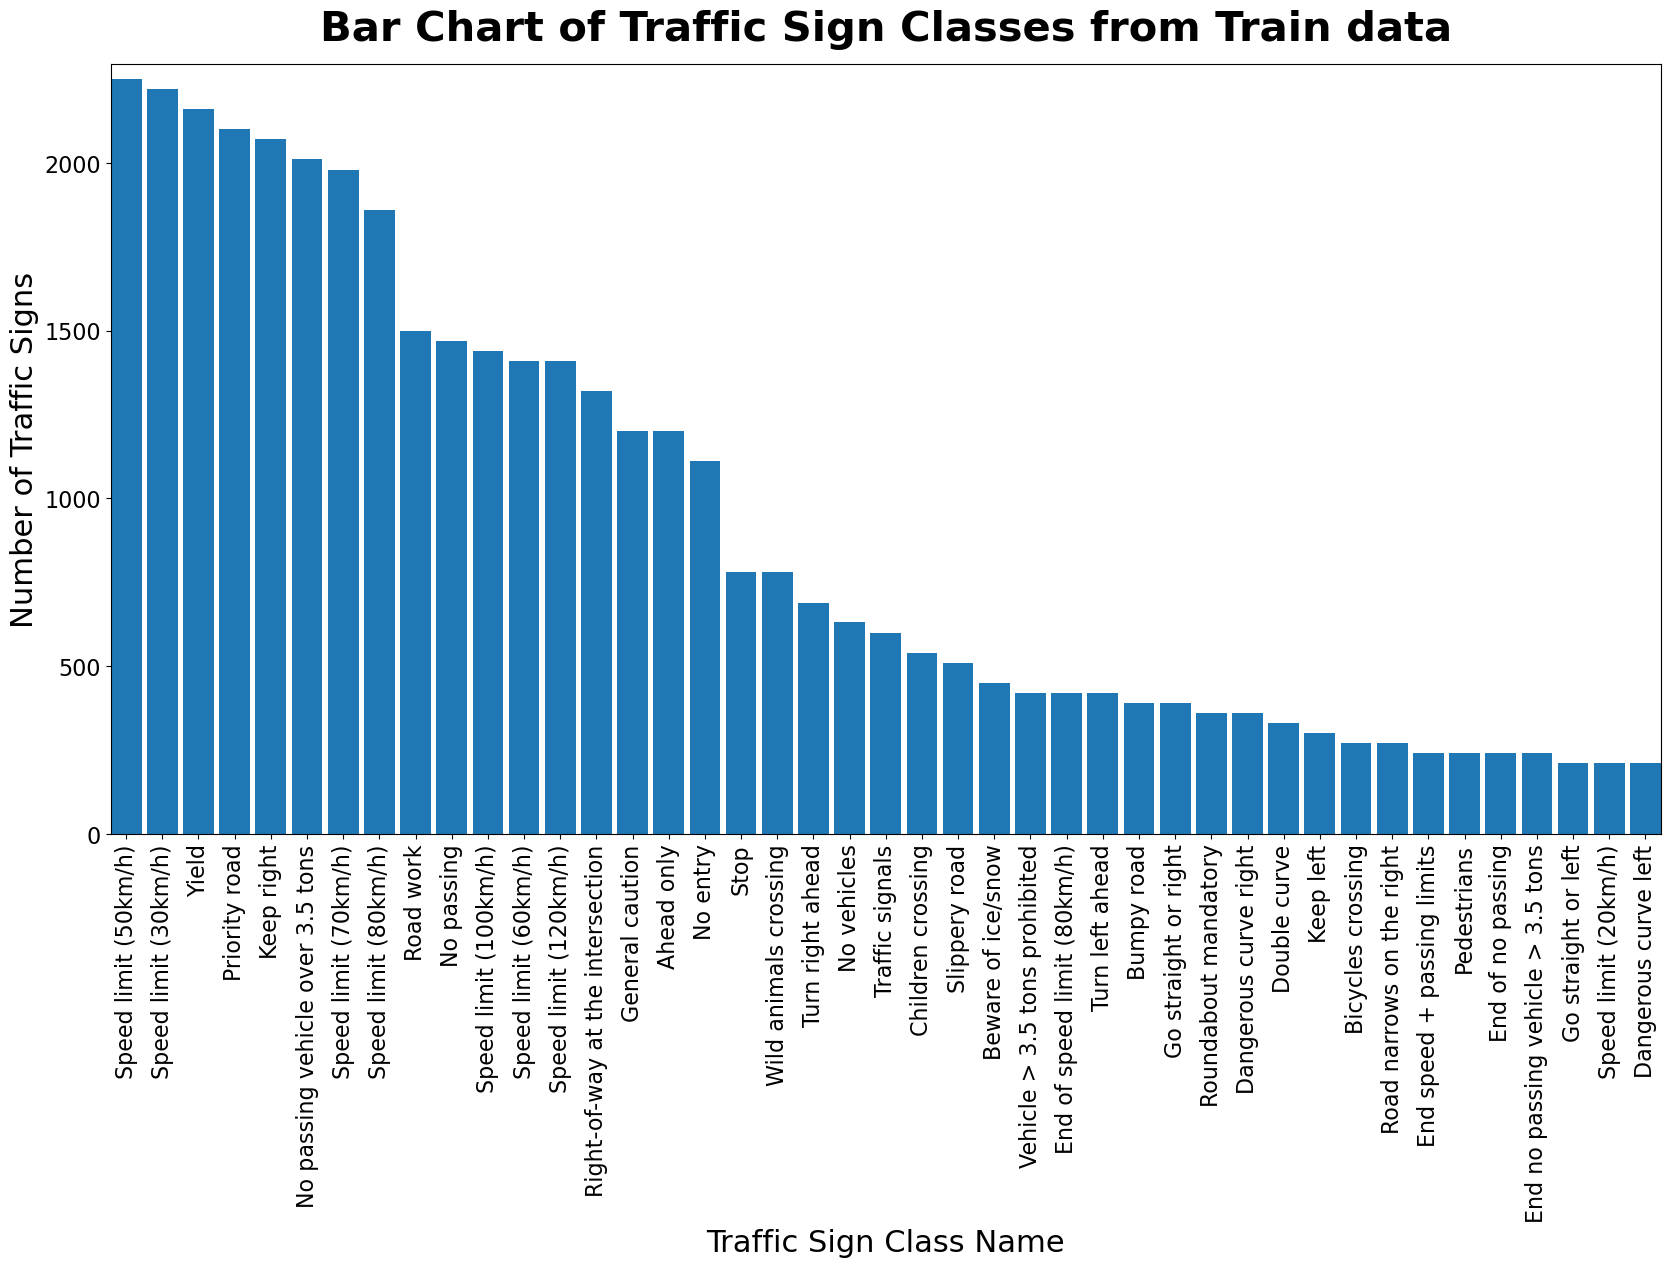

In [25]:
# Plot the bar chart for the 'train' data
plot_bar_chart(data=train_data, data_label="Train", classname=classname)


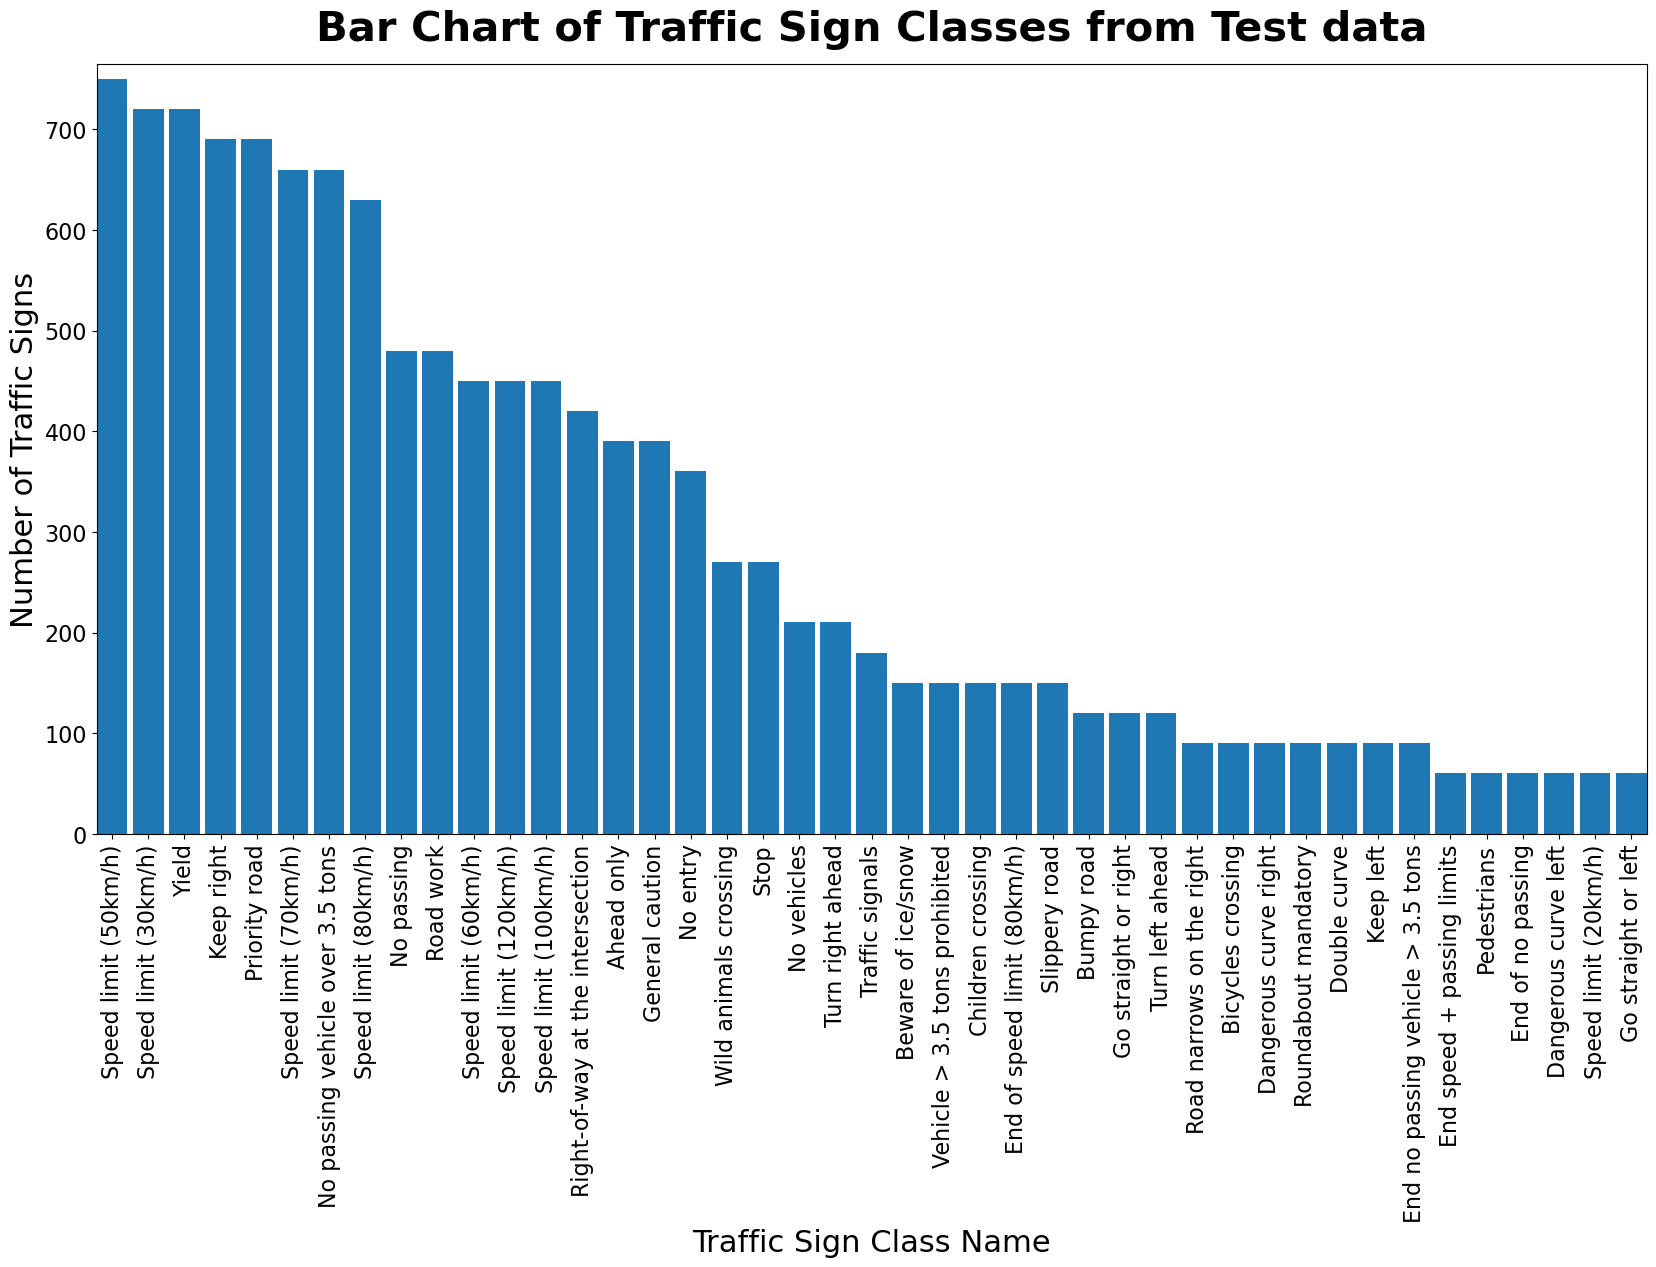

In [26]:
# Plot bar chart for the 'test' data
plot_bar_chart(data=test_data, data_label='Test', classname=classname)


## Preprocess the data (prepare it for the model) 
### Prepare the model's training and testing data

**1. Prepare the model's training data**
* Prepare the model's training data by shuffling the images in the `train_data` dataset:

    - The images in the `train_data` had been listed in order according to the traffic sign label (`ClassId`) specified in the Excel file.
    - To remove biases from the model, the data should be sampled (randomly shuffled).

* Set the X and y data from the shuffled 'train_data'
* Split the shuffled train data to training and validation datasets.
* Convert the labels (y) and data (X) to the format or shape required by the model.

**2. Prepare the model's test data**
* There is no need to shuffle the testing data since this dataset is mainly used for prediction.
* Convert the labels (y) and data (X) to the format or shape required by the model.

**3. Create functions to divide the formatted labels and data into batches to be used by the model**  
For convolutional neural network (CNN) to be able to accurately classify images, one of the most important hyperparameters is the `batch size`, which is the number of images used to train a single forward and backward pass. 
* Create a function to set the batch size and group the data into the specified batch size.

### 1. Prepare the model's training data

In [27]:
###  Sample (shuffle) the data in 'train_data'
train_shuffled = train_data.sample(frac=1, random_state=42, ignore_index=True)
train_shuffled.head()

,ClassId,Path,color_img_arr,grayscale_img_arr
0,26,Train/26/00026_00001_00003.png,"[[[0.41124186, 0.22692813, 0.16026144], [0.365...","[[[0.2743968], [0.24826884], [0.22557282], [0...."
1,14,Train/14/00014_00014_00010.png,"[[[0.22165579, 0.23559915, 0.22017431], [0.171...","[[[0.2296495], [0.17101865], [0.1640641], [0.1..."
2,13,Train/13/00013_00020_00000.png,"[[[0.33338782, 0.34432462, 0.33236387], [0.330...","[[[0.33965766], [0.33441845], [0.34198087], [0..."
3,10,Train/10/00010_00017_00021.png,"[[[0.10661766, 0.15955883, 0.21127453], [0.145...","[[[0.14961435], [0.17975973], [0.14278331], [0..."
4,15,Train/15/00015_00008_00015.png,"[[[0.50000006, 0.5514074, 0.66359913], [0.4965...","[[[0.5487765], [0.54011047], [0.544569], [0.55..."


In [28]:
# Using Scikit-Learn train_test_split() split the data into test and validation sets
from sklearn.model_selection import train_test_split

###  Set the X and y data from the shuffled 'train_data'
X = train_shuffled.drop('ClassId', axis=1)
y = train_shuffled['ClassId']

###  Split the shuffled training data to training and validation sets of 80~20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape for the splitted data
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((31367, 3), (7842, 3), (31367,), (7842,))

### Convert the data (X) and labels (y) to the format or shape required by the model

* The data (X) had already been preprocessed (decode, rescale, resize) and saved to the DataFrames in NumPy array format.
* However, TensorFlow only works with tensor, so we will need to convert the NumPy array in the DataFrame to tensors.
* Since we are going to model on both the color and grayscale images, let's convert 2 sets of X data.
* The labels (y) which is the `ClassId` in the DataFrames will also have to be converted to tensors in the `one-hot` encoded format.

In [29]:
###  Convert the labels (y) and data (X) to the format or shape required by the model.

# The data (X) had already been preprocessed (decode, rescale, resize) and saved to the DataFrame as NumPy array

# Format the training data
X_train_color = [tf.convert_to_tensor(numpy_arr) for numpy_arr in X_train['color_img_arr']]
X_train_gray = [tf.convert_to_tensor(numpy_arr) for numpy_arr in X_train['grayscale_img_arr']]
y_train_data = tf.one_hot(y_train, depth=43)

# Format the validation data
X_val_color = [tf.convert_to_tensor(numpy_arr) for numpy_arr in X_val['color_img_arr']]
X_val_gray = [tf.convert_to_tensor(numpy_arr) for numpy_arr in X_val['grayscale_img_arr']]
y_val_data = tf.one_hot(y_val, depth=43)


### 2. Prepare the model's test data

In [30]:
###  Convert the labels (y) and data (X) to the format or shape required by the model.

# Format the test data
X_test_color = [tf.convert_to_tensor(numpy_arr) for numpy_arr in test_data['color_img_arr']]
X_test_gray = [tf.convert_to_tensor(numpy_arr) for numpy_arr in test_data['grayscale_img_arr']]
y_test_data = tf.one_hot(test_data['ClassId'], depth=43)


### 3. Create functions to divide the formatted labels and data into batches to be used by the model

1. Create a function `get_image_label()` to return the input parameters as a tuple  


2. Create a function `create_data_batches()` to format and create batches for the data:
    * X is the `tensor` images converted from either the `color_img_arr` or `grayscale_img_arr` in the DataFrame.
    * This function will use the `tf.dataDataset.from_tensor_slices` function to slice the tuple of (image, label) arrays into individual images.
    * This function will return data batches of `tensor` images after dividing the data into the specified `batch size`.

In [31]:
# Create a pass through function to return a tuple (image, label)
def get_image_label(image, label=None):
    """
    return the input parameters as a tuple (image, label)
    """
    return image, label


In [32]:
# Create the function to format and create batches for the data

# Specify the batch size
BATCH_SIZE = 32

# Create the function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, data_type='', test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs.
    Also accepts test data as input (no labels).
    """
    # If test data, we will assume that there is no labels
    if test_data:
        print("Creating batches for test data (no labels) use for predictions...")
        data = tf.data.Dataset.from_tensor_slices((X))            # Slices the Tensor images into tuples
        # Create (image, label) tuples in batches
        data_batch = data.map(get_image_label).batch(batch_size)  # Map the tuples and divide them into batches
    else:
        print(f"Creating batches for {data_type} data...")
            
        # Training or validation data has labels
        data = tf.data.Dataset.from_tensor_slices((X, y))        # Slices the Tensor images and labels into tuples
        # Create (image, label) tuples in batches
        data_batch = data.map(get_image_label).batch(batch_size)  # Map the tuples and divide them into batches
        
    return data_batch


### Create data batches for the `training`, `validation` and `test` sets
If data batches are to be used, all the data used in the modeling will have to be converted 
* Create data batches for the `color` images for the `training` and `validation` sets
* Create data batches for the `grayscale` images for the `training` and `validation` sets
* Create data batches for the `test` set for both the `color` and `grayscale` images

In [33]:
# Create training and validation data batches for the 'color' images
train_data_color = create_data_batches(X=X_train_color, y=y_train_data, data_type='color - training')
val_data_color = create_data_batches(X=X_val_color, y=y_val_data, data_type='color - validation')
                                           
# Create training and validation data batches for the 'grayscale' images
train_data_gray = create_data_batches(X=X_train_gray, y=y_train_data, data_type='grayscale - training')
val_data_gray = create_data_batches(X=X_val_gray, y=y_val_data, data_type='grayscale - validation')

# Create test data for evaluation, need to have both X_test and y_test data in the batch
test_eval_data_color = create_data_batches(X=X_test_color, y=y_test_data, data_type='color - test evaluation')
test_eval_data_gray = create_data_batches(X=X_test_gray, y=y_test_data, data_type='grayscale = test evaluation')

# Create test data batches for 'color' and 'grayscale' images
test_data_color = create_data_batches(X=X_test_color, y=y_test_data, test_data=True)
test_data_gray = create_data_batches(X=X_test_gray, y=y_test_data, test_data=True)

Creating batches for color - training data...
Creating batches for color - validation data...
Creating batches for grayscale - training data...
Creating batches for grayscale - validation data...
Creating batches for color - test evaluation data...
Creating batches for grayscale = test evaluation data...
Creating batches for test data (no labels) use for predictions...
Creating batches for test data (no labels) use for predictions...


### Visualizing Data Batches

The data batches had been created. Let's check if the images are still intact.

<font size="3">**Create a function to display a plot of 3 images with their labels from a data batch.**</font>  
* The function will display 3 images from a batch of 32 (0 ~ 32).
* You can enter the image number from 0 to 29 in the `img_num` parameter to display the set of images.
* If the `img_num` is greater than 29 (the last 3 images `img_num` are 29, 30 and 31), than the first 3 images will be displayed. 

In [34]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_images(images, labels, img_num=0):
  """
  Displays a plot of 3 images and their labels from a data batch
  starting with the img_num specified.
  """
  # In order to avoid index out of bound error, recirculate the image number to 0
  if img_num > 29:
    img_num = 0

  # Setup the figure
  plt.figure(figsize=(8, 8))

  # Loop through 3 (for displaying 3 images)
  for i in range(3):
    # Create subplots (1 rows, 3 columns)
    ax = plt.subplot(1, 3, i+1)
    # Display an image
    plt.imshow(images[img_num])
    # Add the image label as the title
    plt.title(classname[labels[img_num].argmax()])
    # Turn the grid lines off
    plt.axis("off")
    # Increment the img_num
    img_num += 1
    

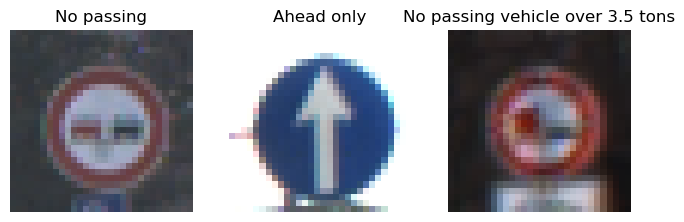

In [35]:
# Now let's visualize the data in a training batch
batch_images, batch_labels = next(train_data_color.as_numpy_iterator())
show_images(batch_images, batch_labels, 6)

### Note: If want to display other batches of images, first get the list of batches to access them
# batches = list(train_data_color.as_numpy_iterator())   # Get list of batches
# batch_images, batch_labels = batches[0]                # Get the images for the specified batch
# show_images(batch_images, batch_labels, 6)             # Display the images from the selected batch

## Create CNN Models

The next step is to create Convolutional Neural Network (CNN) models for both the `grayscale` and `color` images using `Keras` library:
* Add `Convolutional`, `MaxPool`, and `Dropout` Layers for the model
* Use `Relu` as the activation function
* Since this is a mult-class classification model, 
    * use `categorical_crossentropy` for the loss function if the labels are one-hot encoded
    * use `sparse_categorical_crossentropy` for the loss function if the labels are kept as numerical
* Use `Adam` as the optimizer
* Use `early-stopping` with two (2) `patience` and monitor for validation loss (`val_loss`)
* Experiment with five (5) `epochs`
* Refine the CNN model color images until and accuracy of 90% is achieved by different filter shapes, neurons, activation functions, optimizers, and architecture
* Plot the training and validation `accuracy` curves for the `grayscale` and `color` models
* Observe the `precision`, `recall`, and the `F1-score` for all classes for both the `grayscale` and `color` models.
* Determine if the model's classes are good
* Compare the `color` and `grayscale` CNN models and analyze which model is better

## Create functions for building, training, and evaluating CNN model

Since we are going to experiment with different models for both the `grayscale` and `color` images, let's create functions to build differnet models with different configurations for each model.

Also, create functions to train (fit) and evaluate the models.

### Function to Create Model

Different CNN models are specified in the `create_model()` function and can be chosen with a model number and specifying if the data is for `color` or `grayscale` images.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Function to create a model
def create_model(model_num=1, img_is_color=True):
    """
    Create a model according to the model number specified 
    for either the 'color' or 'grayscale' images
    """
    # Input shape for RGB (color) images has 3 channels
    if img_is_color:
        shape_input = (30, 30, 3)
    # Input shape for grayscale images only has 1 channel
    else:
        shape_input = (30, 30, 1)
    
    # Model as configured for each model number
    match model_num:
        # Model 1 - Baseline Model
        case 1:       
            model = Sequential([
                Conv2D(filters=32, kernel_size=3, strides=1, input_shape=shape_input, activation="relu"),
                MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(), 
                Flatten(),
                Dense(128, activation="relu"),
                Dense(43, activation="softmax")
            ])
            
        # Model 2 = Same as Model 1 with a Dropout layer added
        case 2:   
            model = Sequential([
                Conv2D(filters=32, kernel_size=3, strides=1, input_shape=shape_input, activation="relu"),
                MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(), 
                Flatten(),
                Dense(128, activation="relu"),
                Dropout(rate=0.25),
                Dense(43, activation="softmax")
            ])

            
        # Model 3 - Add another Conv2D layer to Model 2
        case 3:
            model = Sequential([
                Conv2D(filters=32, kernel_size=3, strides=1, input_shape=shape_input, activation="relu"),
                MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
                Conv2D(64, 3, 1, activation="relu"),
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(), 
                Flatten(),
                Dense(128, activation="relu"),
                Dropout(rate=0.25),
                Dense(43, activation="softmax")
            ])
            
        # Model 4 - Add another Dropout layer to Model 3
        case 4:
            model = Sequential([
                Conv2D(32, 3, 1, input_shape=shape_input, activation="relu"),
                MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
                Conv2D(64, 3, 1, activation="relu"),
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(),
                Flatten(),
                Dropout(rate=0.25),
                Dense(128, activation="relu"),
                Dropout(rate=0.25),
                Dense(43, activation="softmax")
            ])
        
        
        # Model 5 - Add another Conv2D layer to Model 4
        case 5: 
            model = Sequential([
                Conv2D(32, 3, 1, input_shape=shape_input, activation="relu"),
                Conv2D(32, 3, 1, activation="relu"),
                MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
                Conv2D(64, 3, 1, activation="relu"),
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(),
                Flatten(),
                Dropout(rate=0.25),
                Dense(128, activation="relu"),
                Dropout(rate=0.25),
                Dense(43, activation="softmax")
            ])
        
        # Model 6 - Decrease filters in 2 Conv2D layers and a Dense layer to Model 5
        case 6: 
            model = Sequential([
                Conv2D(32, 3, 1, input_shape=shape_input, activation="relu"),
                Conv2D(32, 3, 1, activation="relu"),
                MaxPool2D(),
                Conv2D(32, 3, 1, activation="relu"),  # Filters changed from 64 to 32
                Conv2D(32, 3, 1, activation="relu"),  # Filters changed from 64 to 32
                MaxPool2D(),
                Flatten(),
                Dropout(rate=0.25),
                Dense(256, activation="relu"),  # Filters changed from 128 to 256
                Dropout(rate=0.25),
                Dense(43, activation="softmax")            
            ])
            
        # Model 7 - Increase filters in Dense layer from 128 to 256 to Model 5
        case 7: 
            model = Sequential([
                Conv2D(32, 3, 1, input_shape=shape_input, activation="relu"),
                Conv2D(32, 3, 1, activation="relu"),
                MaxPool2D(),
                Conv2D(64, 3, 1, activation="relu"),
                Conv2D(64, 3, 1, activation="relu"),
                MaxPool2D(),
                Flatten(),
                Dropout(rate=0.25),
                Dense(256, activation="relu"),
                Dropout(rate=0.25),
                Dense(43, activation="softmax")            
            ])
            
        case default:
            model = "Not Implemented"
            
    return model


### Function to Create and Compile a Model

* Since the labels are `one-hot` encoded, use `categorical_crossentropy` loss function to compile the model
* Use `Adam` optimizer and `accuracy` metrics

<font size="3">**Note:** Create a function `create_compile_model` to create and compile a model by specifying a model number and whether the images used are `color` or `grayscale` [`img_is_color`=True or `img_is_color`=False] </font>

In [37]:
# Function to create and compile the specified model
def create_compile_model(model_num=1, img_is_color=True):
    """
    Create a model according to the selected model number and image type
    and compile the image using the hyperparameters specified
    """
    # Create model
    model = create_model(model_num=model_num, img_is_color=img_is_color)
    
    # In case the model number had not been implemented yet
    try:
        # Compile the model with loss=tf.keras.losses.CategoricalCrossentropy
        model.compile(loss="categorical_crossentropy",  # use for multi-class with one-hot labels
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
    except:
        print("Model:", model)
    
    # return the model
    return model


### Early Stopping Callback Function

Since we are going to use early stopping callback for the model, let's first create a `Early Stopping Callback` function.

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

* Use early-stop with two patience and monitor for validation loss

In [38]:
# Create Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=2)


### Function to Fit a model

Create a function to fit the created and compiled model in the same manner with either the `color` or `grayscale` datasets.

* model - the model to fit
* train_data - the dataset used for training the model
* validation_data - this dataset is not used in the training; it is used for validation
* epochs - the number of epochs to run the model is defaulted to 5
* callbacks - the list of callbacks (if any are to be used) 

In [39]:
# Create function to fit the model with specified dataset
NUM_EPOCHS =5

def fit_model(model, train_data, validation_data, epochs=5, callbacks=None):
    """
    Fit the model with the training data for the number of epochs specified
    """
    # Save the model training results to 'history'
    history = model.fit(x=train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data),
                        callbacks=callbacks)
    return history


### Function to Plot the training and validation accuracy for color and grayscale models

Create a function to plot the training and validation accuracy and loss curves for the models 

In [110]:
# Plot training and validation accuracy and loss curves
def plot_accuracy_loss_curves(history, model_desc=""):
    """
    Display the accuracy and loss curves for the training and validation metrics.
    """
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 4))
    plt.subplots_adjust(top=0.85)
    fig.suptitle(f"{model_desc} Accuracy and Loss Curves for Training and Validation Metrics")
    
    epochs = range(1, len(history.history["accuracy"]) + 1) # how many epochs we run for?

    # Plot accuracy
    ax1.plot(epochs, accuracy, label="training_accuracy")
    ax1.plot(epochs, val_accuracy, label="val_accuracy")
    ax1.set_title("Accuracy")
    ax1.set_xlabel("epochs")
    ax1.set_ylabel("metrics")
    ax1.legend()
    
    # Plot loss
    ax2.plot(epochs, loss, label="training_loss")
    ax2.plot(epochs, val_loss, label="val_loss")
    ax2.set_title("Loss")
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("metrics")
    ax2.legend();
    


### Functions to Predict and Evaluate a Trained Model

1. `get_model_prediction_labels` 
- make predictions with the specified model and dataset
- returns the predictions with the numerical label (0 ~ 42) values of the classes

2. `get_metrics`
- Display the metrics of the model using Scikit-Learn to get the `Accuracy`, `Precision`, `Recall` and `F-1` scores

3. `get_model_metrics`
- Use the `get_model_prediction_labels` to get the prediction in numerical label values
- Get the model metrics with the actual and predicted labels for the model

In [41]:
# Function that convert the model predictions probabilities matrix to return the predicted labels
def get_model_prediction_labels(model, data):
    """
    Use model.predict() to find the predictions probabilities
    Return a list of predicted labels decoded from the probabilites
    """
    # Predicts with the specified model and data
    preds = model.predict(data, verbose=0)
    
    # return the list of predictions converted to numerical labels (0 ~ 42)
    return np.array([np.argmax(preds[i]) for i in range(len(preds))])
    

In [42]:
# Function to display the accuracy, precision, recall and F1-scores using the Scikit-Learn libaries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def get_metrics(model_desc, actual, preds, labels):
    """
    Print the metrics for accuracy, precision, recall and F1-scores
    """
    metrics = [accuracy_score(actual, preds)]
    metrics.append(precision_score(actual, preds, labels=labels, average="macro"))
    metrics.append(recall_score(actual, preds, labels=labels, average="macro"))
    metrics.append(f1_score(actual, preds, labels=labels, average="macro"))
    
    print(model_desc)
    print("Accuracy Score:", metrics[0])
    print("Precision Score:", metrics[1])
    print("Recall Score:", metrics[2])
    print("F-1 Score:", metrics[3])
    print("")
    
    return metrics


In [43]:
# Function to get the model's metrics from the model predictions
def get_model_metrics(model_desc, model, model_data, actual, labels):
    """
    Get the model predictions and print it's metrics
    """
    preds = get_model_prediction_labels(model, model_data)
    
    get_metrics(model_desc, actual, preds, labels)
    
    return preds


## Experiment with different models

1. Create and compile a model (first for `grayscale` images then for `color` images 
2. Fit the model
3. Plot the accuracy and loss curves for the model
4. Evaluate the model
5. Make predictions with the model and show the metrics for the model performance

### Model 1

Create `Model` 1 with Conv2D -> MaxPool2D -> Conv2D -> MaxPool2D -> Flatten -> Dense -> Dense layers.

>     model = Sequential([
          Conv2D(filters=32, kernel_size=3, strides=1, input_shape=shape_input, activation="relu"),
          MaxPool2D(pool_size=2),  # default pool_size=(2, 2)
          Conv2D(64, 3, 1, activation="relu"),
          MaxPool2D(), 
          Flatten(),
          Dense(128, activation="relu"),
          Dense(43, activation="softmax")
     ])
       
* input_shape used for `grayscale` images model is (30, 30, 1)
* input_shape used for `color` images model is (30, 30, 3)

In [44]:
# Create and compile the model with the grayscale images
model_1_gray = create_compile_model(model_num=1, img_is_color=False) 

# Fit the model
try:
    history_1_gray = fit_model(model=model_1_gray,
                               train_data=train_data_gray,
                               validation_data=val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
 20/981 [..............................] - ETA: 5s - loss: 3.6148 - accuracy: 0.0609

2023-01-13 17:01:08.550315: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


981/981 [==============================] - 8s 7ms/step - loss: 1.2516 - accuracy: 0.6691 - val_loss: 0.3574 - val_accuracy: 0.8963
Epoch 2/5
981/981 [==============================] - 8s 8ms/step - loss: 0.2288 - accuracy: 0.9416 - val_loss: 0.1555 - val_accuracy: 0.9607
Epoch 3/5
981/981 [==============================] - 8s 8ms/step - loss: 0.1161 - accuracy: 0.9702 - val_loss: 0.1162 - val_accuracy: 0.9686
Epoch 4/5
981/981 [==============================] - 8s 8ms/step - loss: 0.0774 - accuracy: 0.9794 - val_loss: 0.0878 - val_accuracy: 0.9759
Epoch 5/5
981/981 [==============================] - 7s 8ms/step - loss: 0.0551 - accuracy: 0.9853 - val_loss: 0.0681 - val_accuracy: 0.9830


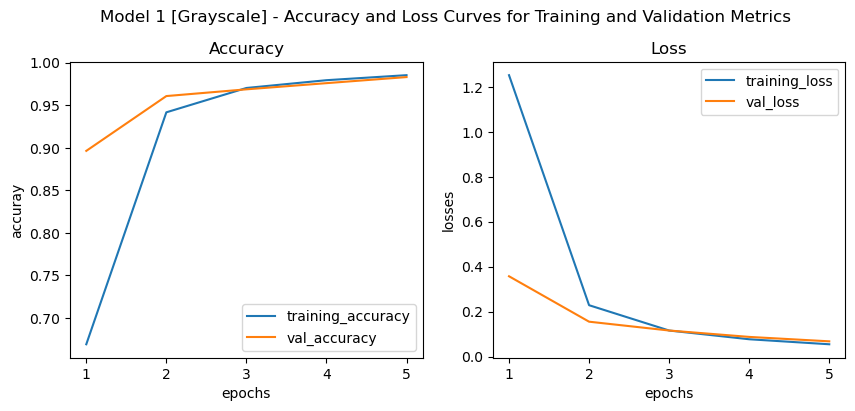

In [45]:
# Plot the accuracy and loss curves
plot_accuracy_loss_curves(history_1_gray, "Model 1 [Grayscale] -")

In [46]:
# Evaluate on the test data
model_1_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.9144


[0.5262158513069153, 0.9144101142883301]

In [47]:
# Actual labels for test data (numerical traffic sign classes assigned to corresponding test_data images)
actuals = test_data['ClassId']

# Make predictions on test data batch using model 1 and print its prediction metrics
preds_1_gray = get_model_metrics('Model 1 [grayscale images] Metrics:', 
                                 model_1_gray, test_data_gray, actuals, labels)


Model 1 [grayscale images] Metrics:
Accuracy Score: 0.9144101346001584
Precision Score: 0.8860121039368876
Recall Score: 0.8868910258561422
F-1 Score: 0.8803797267516359



In [48]:
# Create model 1 with color images
model_1_color = create_compile_model(model_num=1, img_is_color=True)

try: 
    # Fit the model with color images
    history_1_color = fit_model(model=model_1_color,
                                train_data=train_data_color,
                                validation_data=val_data_color,
                                epochs=NUM_EPOCHS,
                                callbacks=[early_stopping])
except:
    pass


Epoch 1/5
981/981 [==============================] - 8s 7ms/step - loss: 1.0994 - accuracy: 0.7013 - val_loss: 0.3010 - val_accuracy: 0.9082
Epoch 2/5
981/981 [==============================] - 7s 7ms/step - loss: 0.1827 - accuracy: 0.9523 - val_loss: 0.1629 - val_accuracy: 0.9515
Epoch 3/5
981/981 [==============================] - 7s 7ms/step - loss: 0.0950 - accuracy: 0.9755 - val_loss: 0.1174 - val_accuracy: 0.9651
Epoch 4/5
981/981 [==============================] - 7s 7ms/step - loss: 0.0591 - accuracy: 0.9847 - val_loss: 0.0796 - val_accuracy: 0.9800
Epoch 5/5
981/981 [==============================] - 7s 7ms/step - loss: 0.0414 - accuracy: 0.9894 - val_loss: 0.0729 - val_accuracy: 0.9821


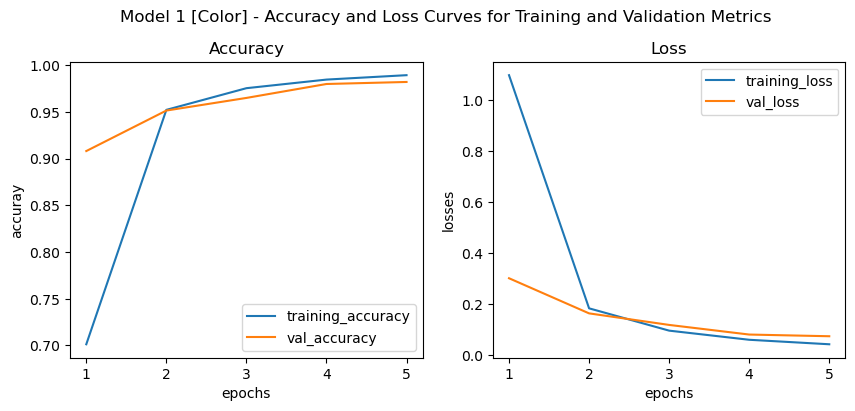

In [49]:
plot_accuracy_loss_curves(history_1_color, "Model 1 [Color] -")

In [50]:
# Evaluate on the test data
model_1_color.evaluate(test_eval_data_color)

395/395 [==============================] - 1s 2ms/step - loss: 0.4193 - accuracy: 0.9150


[0.41934889554977417, 0.9150435328483582]

In [51]:
# Make predictions on test data batch using model 1 and print its prediction metrics
preds_1_color = get_model_metrics('Model 1 [color images] Metrics:',
                                  model_1_color, test_data_color, actuals, labels)

Model 1 [color images] Metrics:
Accuracy Score: 0.9150435471100554
Precision Score: 0.887732886570711
Recall Score: 0.8889829603886732
F-1 Score: 0.8798522519977264



### Observations for Model 1: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.5489 - accuracy: 0.9089.
* The loss and accuracy for the `color` model on the test data is - loss: 0.4040 - accuracy: 0.9148.
* The `color` model is performing slightly better than the `grayscale` model 


| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |


### Model 2 - added a Dropout Layer to Model 1

Create `Model 2` - Conv2D -> MaxPool2D -> Conv2D -> MaxPool2D -> Flatten -> Dense -> `Dropout` -> Dense layer
- same as `Model 1` with a added Dropout layer with rate=0.25

In [52]:
# Create model 2 with grayscale images
model_2_gray = create_compile_model(model_num=2, img_is_color=False)

try:
    # Fit the model
    history_2_gray = fit_model(model_2_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 7s 7ms/step - loss: 1.4867 - accuracy: 0.5974 - val_loss: 0.3208 - val_accuracy: 0.9192
Epoch 2/5
981/981 [==============================] - 7s 7ms/step - loss: 0.3638 - accuracy: 0.8949 - val_loss: 0.1677 - val_accuracy: 0.9579
Epoch 3/5
981/981 [==============================] - 7s 7ms/step - loss: 0.2162 - accuracy: 0.9355 - val_loss: 0.0897 - val_accuracy: 0.9772
Epoch 4/5
981/981 [==============================] - 7s 7ms/step - loss: 0.1507 - accuracy: 0.9552 - val_loss: 0.0695 - val_accuracy: 0.9833
Epoch 5/5
981/981 [==============================] - 7s 7ms/step - loss: 0.1151 - accuracy: 0.9650 - val_loss: 0.0606 - val_accuracy: 0.9841


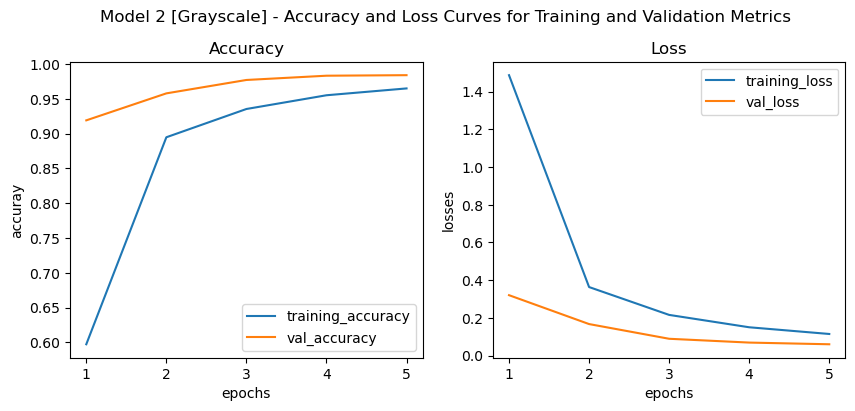

In [53]:
plot_accuracy_loss_curves(history_2_gray, "Model 2 [Grayscale] -")

In [54]:
# Evaluate on the test data
model_2_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9351


[0.27820736169815063, 0.9350752234458923]

In [55]:
# Make predictions on test data batch using model 2 and print its prediction metrics
preds_2_gray = get_model_metrics('Model 2 [grayscale images] Metrics:', 
                                 model_2_gray, test_data_gray, actuals, labels)

Model 2 [grayscale images] Metrics:
Accuracy Score: 0.9350752177355502
Precision Score: 0.9250439489145976
Recall Score: 0.9103535258509983
F-1 Score: 0.9146624022480325



In [56]:
# Create model 2 with color images
model_2_color = create_compile_model(model_num=2, img_is_color=True)

try:
    # Fit the model
    history_2_color = fit_model(model_2_color,
                                train_data_color,
                                val_data_color,
                                epochs=NUM_EPOCHS,
                                callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 8s 8ms/step - loss: 1.3018 - accuracy: 0.6343 - val_loss: 0.2700 - val_accuracy: 0.9305
Epoch 2/5
981/981 [==============================] - 8s 8ms/step - loss: 0.2787 - accuracy: 0.9182 - val_loss: 0.1013 - val_accuracy: 0.9767
Epoch 3/5
981/981 [==============================] - 7s 7ms/step - loss: 0.1615 - accuracy: 0.9539 - val_loss: 0.0634 - val_accuracy: 0.9852
Epoch 4/5
981/981 [==============================] - 7s 7ms/step - loss: 0.1095 - accuracy: 0.9681 - val_loss: 0.0654 - val_accuracy: 0.9839
Epoch 5/5
981/981 [==============================] - 7s 7ms/step - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.0426 - val_accuracy: 0.9894


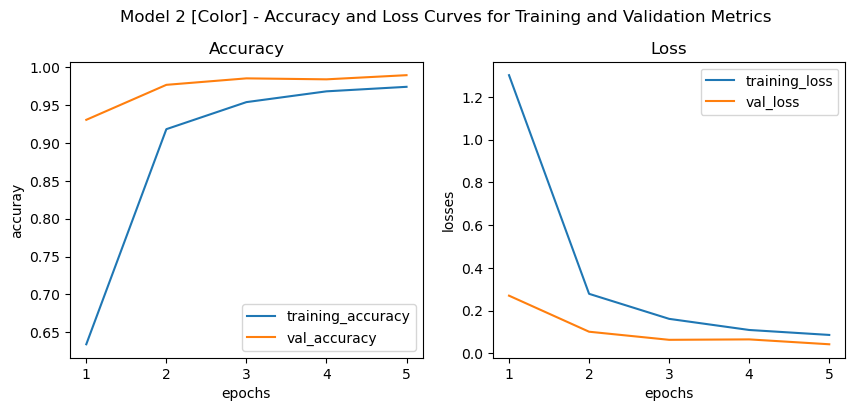

In [57]:
plot_accuracy_loss_curves(history_2_color, "Model 2 [Color] -")

In [58]:
# Evaluate on the test data
model_2_color.evaluate(test_eval_data_color)

395/395 [==============================] - 1s 2ms/step - loss: 0.2532 - accuracy: 0.9433


[0.2532072067260742, 0.9433096051216125]

In [59]:
# Make predictions on test data batch using model 2 and print its prediction metrics
preds_2_color = get_model_metrics('Model 2 [color images] Metrics:', 
                                  model_2_color, test_data_color, actuals, labels)

Model 2 [color images] Metrics:
Accuracy Score: 0.9433095803642122
Precision Score: 0.9343806379761309
Recall Score: 0.9079887855656308
F-1 Score: 0.9133173527984109



 ### Observations for Model 2: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.3656 - accuracy: 0.9260.
* The loss and accuracy for the `color` model on the test data is - loss: 0.2982 - accuracy: 0.9385.
* The `color` model is performing slightly better than the `grayscale` model 
* `Model 2` performs better than `Model 1` 


| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |


### Model 3 - added a Conv2D Layer to Model 2

Create `Model 3` - Conv2D -> MaxPool2D -> Conv2D -> `Conv2D` -> MaxPool2D -> Flatten -> Dense -> Dropout -> Dense layer
- same as `Model 2` with a added Conv2D layer


In [60]:
# Create model 3 with gray images
model_3_gray = create_compile_model(model_num=3, img_is_color=False)

try:
    # Fit the model
    history_3_gray = fit_model(model_3_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 11s 10ms/step - loss: 1.2279 - accuracy: 0.6623 - val_loss: 0.1810 - val_accuracy: 0.9467
Epoch 2/5
981/981 [==============================] - 10s 10ms/step - loss: 0.2084 - accuracy: 0.9385 - val_loss: 0.0801 - val_accuracy: 0.9796
Epoch 3/5
981/981 [==============================] - 11s 11ms/step - loss: 0.1204 - accuracy: 0.9637 - val_loss: 0.0518 - val_accuracy: 0.9851
Epoch 4/5
981/981 [==============================] - 11s 11ms/step - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0432 - val_accuracy: 0.9895
Epoch 5/5
981/981 [==============================] - 11s 11ms/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0392 - val_accuracy: 0.9909


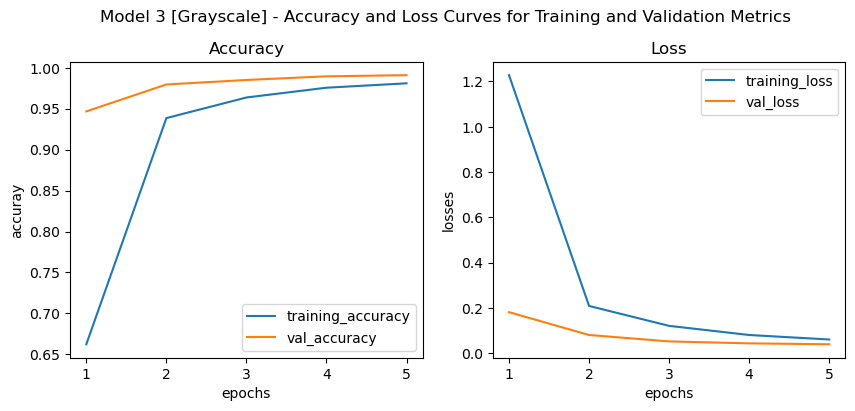

In [61]:
plot_accuracy_loss_curves(history_3_gray, "Model 3 [Grayscale] -")

In [62]:
# Evaluate on the test data
model_3_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 1s 4ms/step - loss: 0.2480 - accuracy: 0.9466


[0.2480008453130722, 0.9465557932853699]

In [63]:
# Make predictions on test data batch using model 3 and print its prediction metrics
preds_3_gray = get_model_metrics('Model 3 [grayscale images] Metrics:', 
                                 model_3_gray, test_data_gray, actuals, labels)


Model 3 [grayscale images] Metrics:
Accuracy Score: 0.9465558194774347
Precision Score: 0.9351747208716223
Recall Score: 0.9158489794106578
F-1 Score: 0.9222634206138833



In [64]:
# Create model 3 with color images
model_3_color = create_compile_model(model_num=3, img_is_color=True)

try:
    # Fitt the model
    history_3_color = fit_model(model_3_color,
                                train_data_color,
                                val_data_color,
                                epochs=NUM_EPOCHS,
                                callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 11s 11ms/step - loss: 1.0983 - accuracy: 0.6863 - val_loss: 0.1456 - val_accuracy: 0.9615
Epoch 2/5
981/981 [==============================] - 10s 11ms/step - loss: 0.1894 - accuracy: 0.9446 - val_loss: 0.0768 - val_accuracy: 0.9832
Epoch 3/5
981/981 [==============================] - 10s 10ms/step - loss: 0.1028 - accuracy: 0.9691 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 4/5
981/981 [==============================] - 11s 11ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0329 - val_accuracy: 0.9922
Epoch 5/5
981/981 [==============================] - 10s 10ms/step - loss: 0.0505 - accuracy: 0.9851 - val_loss: 0.0242 - val_accuracy: 0.9941


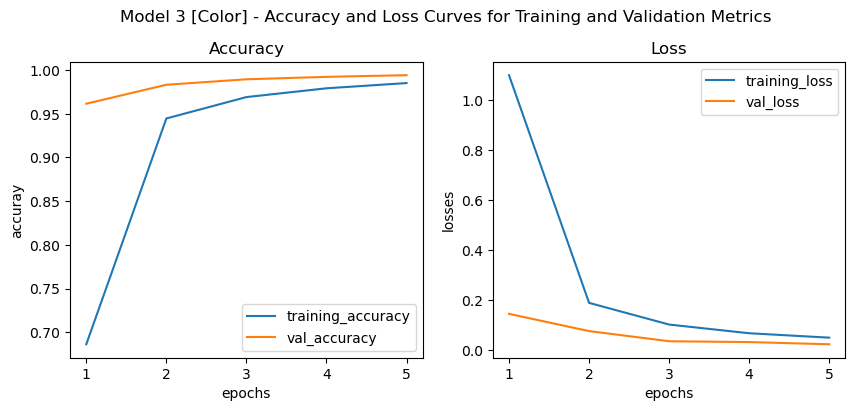

In [65]:
plot_accuracy_loss_curves(history_3_color, "Model 3 [Color] -")

In [66]:
# Evaluate on the test data
model_3_color.evaluate(test_eval_data_color)

395/395 [==============================] - 1s 4ms/step - loss: 0.2151 - accuracy: 0.9559


[0.2150774747133255, 0.955898642539978]

In [67]:
# Make predictions on test data batch using model 3 and print its prediction metrics
preds_3_color = get_model_metrics('Model 3 [color images] Metrics:', 
                                  model_3_color, test_data_color, actuals, labels)


Model 3 [color images] Metrics:
Accuracy Score: 0.9558986539984164
Precision Score: 0.9388652305452023
Recall Score: 0.9423480239286608
F-1 Score: 0.9387522865552463



### Observations for Model 3: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.2806 - accuracy: 0.9415.
* The loss and accuracy for the `color` model on the test data is - loss: 0.2272 - accuracy: 0.9496.
* The `color` model is performing slightly better than the `grayscale` model 
* `Model 3` performs better than `Model 2` 


| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |
| Model 3  | 0.941489 | 0.938267  | 0.904019 | 0.916596  || Modle 3 | 0.949565 | 0.925821  | 0.917706 | 0.916998  | 


### Model 4 - added another Dropout Layer to Model 3

Create `Model 4` - Conv2D -> MaxPool2D -> Conv2D -> Conv2D -> MaxPool2D -> Flatten -> `Dropout` -> Dense -> Dropout -> Dense layer

- same as `Model 3` with another added Dropout layer


In [68]:
# Create model 4 with gray images
model_4_gray = create_compile_model(model_num=4, img_is_color=False)

try:
    # Fit the model
    history_4_gray = fit_model(model_4_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 11s 11ms/step - loss: 1.3421 - accuracy: 0.6240 - val_loss: 0.2147 - val_accuracy: 0.9387
Epoch 2/5
981/981 [==============================] - 11s 11ms/step - loss: 0.2924 - accuracy: 0.9122 - val_loss: 0.1037 - val_accuracy: 0.9712
Epoch 3/5
981/981 [==============================] - 11s 11ms/step - loss: 0.1742 - accuracy: 0.9477 - val_loss: 0.0596 - val_accuracy: 0.9848
Epoch 4/5
981/981 [==============================] - 10s 11ms/step - loss: 0.1260 - accuracy: 0.9625 - val_loss: 0.0557 - val_accuracy: 0.9861
Epoch 5/5
981/981 [==============================] - 11s 11ms/step - loss: 0.0988 - accuracy: 0.9683 - val_loss: 0.0482 - val_accuracy: 0.9895


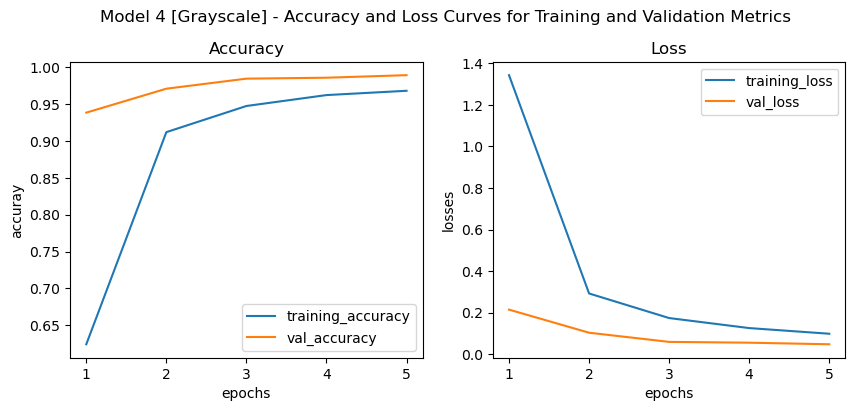

In [69]:
plot_accuracy_loss_curves(history_4_gray, "Model 4 [Grayscale] -")

In [70]:
# Evaluate on the test data
model_4_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.9474


[0.2276928573846817, 0.9474267363548279]

In [71]:
# Make predictions on test data batch using model 4 and print its prediction metrics
preds_4_gray = get_model_metrics('Model 4 [grayscale images] Metrics:', 
                                 model_4_gray, test_data_gray, actuals, labels)



Model 4 [grayscale images] Metrics:
Accuracy Score: 0.9474267616785431
Precision Score: 0.9310372949887552
Recall Score: 0.9284977816251829
F-1 Score: 0.9264802736012985



In [72]:
# Create model 4 with color images
model_4_color = create_compile_model(model_num=4, img_is_color=True)

try:
    # Fit the model
    history_4_color = fit_model(model_4_color,
                                train_data_color,
                                val_data_color,
                                epochs=NUM_EPOCHS,
                                callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 11s 11ms/step - loss: 1.1793 - accuracy: 0.6618 - val_loss: 0.1954 - val_accuracy: 0.9513
Epoch 2/5
981/981 [==============================] - 11s 11ms/step - loss: 0.2349 - accuracy: 0.9279 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 3/5
981/981 [==============================] - 11s 11ms/step - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.0435 - val_accuracy: 0.9889
Epoch 4/5
981/981 [==============================] - 11s 11ms/step - loss: 0.0897 - accuracy: 0.9717 - val_loss: 0.0316 - val_accuracy: 0.9923
Epoch 5/5
981/981 [==============================] - 10s 11ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0353 - val_accuracy: 0.9912


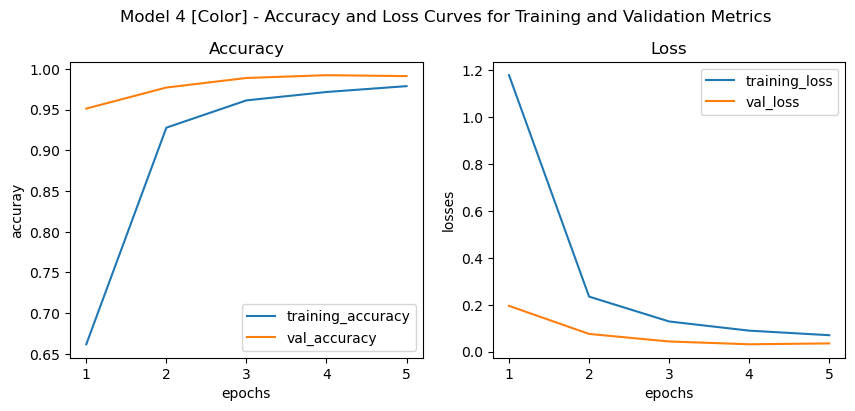

In [73]:
plot_accuracy_loss_curves(history_4_color, "Model 4 [Color] -")

In [74]:
# Evaluate on the test data
model_4_color.evaluate(test_eval_data_color)

395/395 [==============================] - 1s 4ms/step - loss: 0.1770 - accuracy: 0.9537


[0.1769825518131256, 0.9536817073822021]

In [75]:
# Make predictions on test data batch using model 4 and print its prediction metrics
preds_4_color = get_model_metrics('Model 4 [color images] Metrics:', 
                                  model_4_color, test_data_color, actuals, labels)


Model 4 [color images] Metrics:
Accuracy Score: 0.9536817102137767
Precision Score: 0.9412122674894655
Recall Score: 0.938276147690455
F-1 Score: 0.9358447336289352



### Observations for Model 4: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.2806 - accuracy: 0.9415.
* The loss and accuracy for the `color` model on the test data is - loss: 0.2272 - accuracy: 0.9496.
* The `color` model is performing slightly better than the `grayscale` model 
* `Model 4` performs better than `Model 3` 


| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |
| Model 3  | 0.941489 | 0.938267  | 0.904019 | 0.916596  || Modle 3 | 0.949565 | 0.925821  | 0.917706 | 0.916998  | 
| Model 4  | 0.950752 | 0.935220  | 0.924225 | 0.925126  || Model 4 | 0.956215 | 0.943829  | 0.937415 | 0.936780  |


### Model 5 - added another Conv2D Layer to Model 4

Create `Model 5` - Conv2D -> `Conv2D` -> MaxPool2D -> Conv2D -> Conv2D -> MaxPool2D -> Flatten -> Dropout -> Dense -> Dropout -> Dense layer

- same as `Model 4` with another added Conv2D layer


In [76]:
# Create model 5 with gray images
model_5_gray = create_compile_model(model_num=5, img_is_color=False)

try:
    # Fit the model
    history_5_gray = fit_model(model_5_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 16s 16ms/step - loss: 1.2025 - accuracy: 0.6671 - val_loss: 0.1279 - val_accuracy: 0.9681
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1858 - accuracy: 0.9456 - val_loss: 0.0575 - val_accuracy: 0.9853
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1141 - accuracy: 0.9654 - val_loss: 0.0323 - val_accuracy: 0.9923
Epoch 4/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.0332 - val_accuracy: 0.9907
Epoch 5/5
981/981 [==============================] - 16s 17ms/step - loss: 0.0650 - accuracy: 0.9806 - val_loss: 0.0205 - val_accuracy: 0.9950


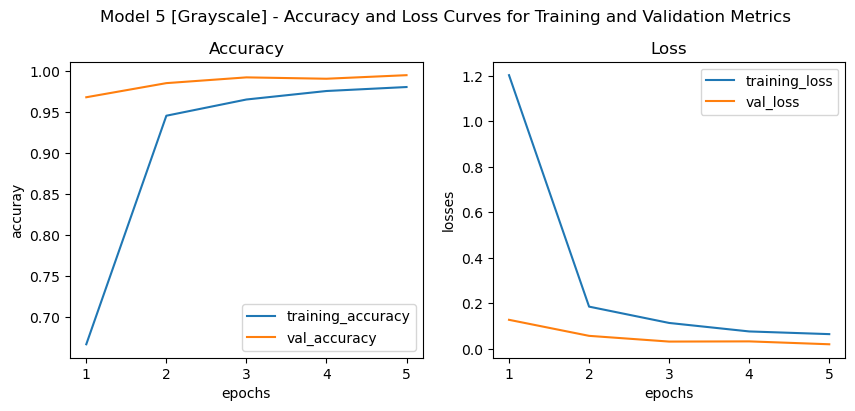

In [77]:
plot_accuracy_loss_curves(history_5_gray, "Model 5 [Grayscale] -")

In [78]:
# Evaluate on the test data
model_5_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 2s 5ms/step - loss: 0.1811 - accuracy: 0.9598


[0.1811276525259018, 0.9597783088684082]

In [79]:
# Make predictions on test data batch using model 5 and print its prediction metrics
preds_5_gray = get_model_metrics('Model 5 [grayscale images] Metrics:', 
                                 model_5_gray, test_data_gray, actuals, labels)


Model 5 [grayscale images] Metrics:
Accuracy Score: 0.959778305621536
Precision Score: 0.9449121827738204
Recall Score: 0.9275727925315893
F-1 Score: 0.9330411709379482



In [80]:
# Create model 5 with color images
model_5_color = create_compile_model(model_num=5, img_is_color=True)

try:
    # Fit the model
    history_5_color = fit_model(model_5_color,
                                train_data_color,
                                val_data_color,
                                epochs=NUM_EPOCHS,
                                callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 16s 16ms/step - loss: 1.0635 - accuracy: 0.6932 - val_loss: 0.1263 - val_accuracy: 0.9690
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1708 - accuracy: 0.9495 - val_loss: 0.0553 - val_accuracy: 0.9844
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0968 - accuracy: 0.9714 - val_loss: 0.0268 - val_accuracy: 0.9931
Epoch 4/5
981/981 [==============================] - 16s 17ms/step - loss: 0.0702 - accuracy: 0.9790 - val_loss: 0.0316 - val_accuracy: 0.9912
Epoch 5/5
981/981 [==============================] - 17s 17ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0215 - val_accuracy: 0.9939


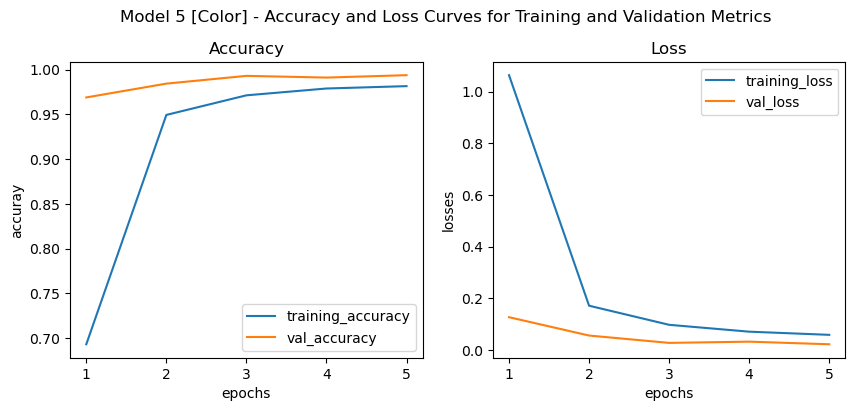

In [81]:
plot_accuracy_loss_curves(history_5_color, "Model 5 [Color] -")

In [82]:
# Evaluate on the test data
model_5_color.evaluate(test_eval_data_color)

395/395 [==============================] - 2s 5ms/step - loss: 0.1490 - accuracy: 0.9633


[0.14900952577590942, 0.963341236114502]

In [83]:
# Make predictions on test data batch using model 5 and print its prediction metrics
preds_5_color = get_model_metrics('Model 5 [color images] Metrics:', 
                                  model_5_color, test_data_color, actuals, labels)



Model 5 [color images] Metrics:
Accuracy Score: 0.963341250989707
Precision Score: 0.9452118059347083
Recall Score: 0.9386348305946385
F-1 Score: 0.9392903912532595



### Observations for Model 5: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.1561 - accuracy: 0.9610.
* The loss and accuracy for the `color` model on the test data is - loss: 0.1957 - accuracy: 0.9568.
* The `grayscale` model is performing slightly better than the `color` model 
* `Model 5` performs better than `Model 4` 


| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |
| Model 3  | 0.941489 | 0.938267  | 0.904019 | 0.916596  || Modle 3 | 0.949565 | 0.925821  | 0.917706 | 0.916998  | 
| Model 4  | 0.950752 | 0.935220  | 0.924225 | 0.925126  || Model 4 | 0.956215 | 0.943829  | 0.937415 | 0.936780  |
| Model 5  | 0.961045 | 0.952587  | 0.938619 | 0.943757  || Model 5 | 0.956770 | 0.948621  | 0.924000 | 0.931033  |


### Model 6 - same as Model 5 except for the number of filters in two Conv2D layers and one Dense layer

Create `Model 6` - Conv2D -> Conv2D -> MaxPool2D -> `Conv2D` -> `Conv2D` -> MaxPool2D -> Flatten -> Dropout -> `Dense` -> Dropout -> Dense layer

- similar to  `Model 5` but with 
    - the number of filters for the second sets of Conv2D layers reduced from 64 to 32
    - and increase the number of filters in the Dense layer after the Flatten layer from 128 to 256


In [84]:
# Create model 6 with gray images
model_6_gray = create_compile_model(model_num=6, img_is_color=False)

try:
    # Fit the model
    history_6_gray = fit_model(model_6_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 14s 14ms/step - loss: 1.1619 - accuracy: 0.6802 - val_loss: 0.1876 - val_accuracy: 0.9486
Epoch 2/5
981/981 [==============================] - 14s 14ms/step - loss: 0.2164 - accuracy: 0.9346 - val_loss: 0.0582 - val_accuracy: 0.9858
Epoch 3/5
981/981 [==============================] - 13s 14ms/step - loss: 0.1358 - accuracy: 0.9588 - val_loss: 0.0452 - val_accuracy: 0.9894
Epoch 4/5
981/981 [==============================] - 13s 14ms/step - loss: 0.1035 - accuracy: 0.9681 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 5/5
981/981 [==============================] - 14s 14ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0344 - val_accuracy: 0.9903


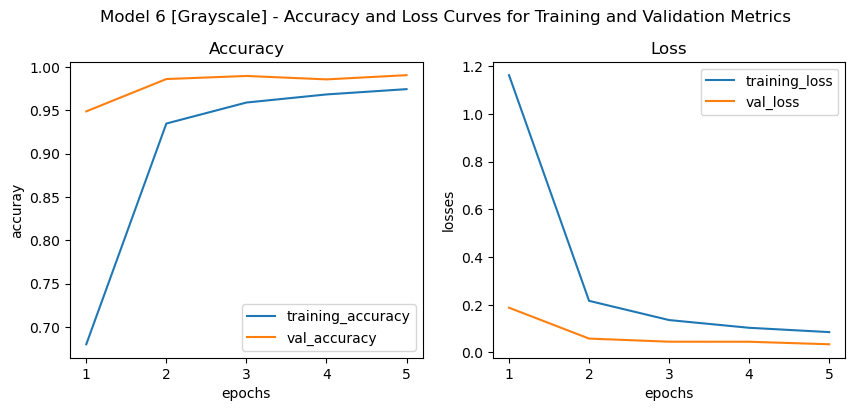

In [85]:
plot_accuracy_loss_curves(history_6_gray, "Model 6 [Grayscale] -")

In [86]:
# Evaluate on the test data
model_6_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 2s 4ms/step - loss: 0.2297 - accuracy: 0.9452


[0.22968704998493195, 0.945209801197052]

In [87]:
# Make predictions on test data batch using model 6 and print its prediction metrics
preds_6_gray = get_model_metrics('Model 6 [grayscale images] Metrics:', 
                                 model_6_gray, test_data_gray, actuals, labels)


Model 6 [grayscale images] Metrics:
Accuracy Score: 0.9452098178939035
Precision Score: 0.9234242545865577
Recall Score: 0.914064797624201
F-1 Score: 0.9127273835294093



In [88]:
# Create model 6 with color images
model_6_color = create_compile_model(model_num=6, img_is_color=True)

try:
    # Fit the model
    history_6_color = fit_model(model_6_color,
                                 train_data_color,
                                 val_data_color,
                                 epochs=NUM_EPOCHS,
                                 callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 14s 14ms/step - loss: 0.9575 - accuracy: 0.7280 - val_loss: 0.1435 - val_accuracy: 0.9619
Epoch 2/5
981/981 [==============================] - 14s 14ms/step - loss: 0.1633 - accuracy: 0.9521 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 3/5
981/981 [==============================] - 14s 15ms/step - loss: 0.0972 - accuracy: 0.9699 - val_loss: 0.0460 - val_accuracy: 0.9885
Epoch 4/5
981/981 [==============================] - 14s 14ms/step - loss: 0.0743 - accuracy: 0.9780 - val_loss: 0.0263 - val_accuracy: 0.9936
Epoch 5/5
981/981 [==============================] - 14s 15ms/step - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0372 - val_accuracy: 0.9916


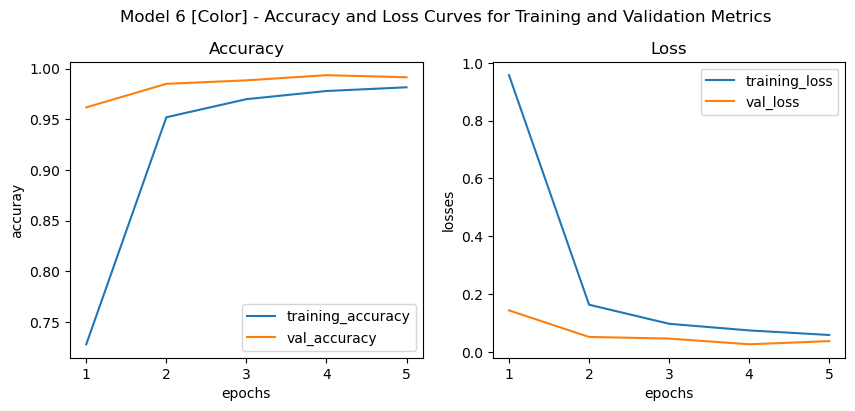

In [89]:
plot_accuracy_loss_curves(history_6_color, "Model 6 [Color] -")

In [90]:
# Evaluate on the test data
model_6_color.evaluate(test_eval_data_color)

395/395 [==============================] - 2s 4ms/step - loss: 0.1504 - accuracy: 0.9607


[0.15036165714263916, 0.9607284069061279]

In [91]:
# Make predictions on test data batch using model 6 and print its prediction metrics
preds_6_color = get_model_metrics('Model 6 [color images] Metrics:', 
                                   model_6_color, test_data_color, actuals, labels)

Model 6 [color images] Metrics:
Accuracy Score: 0.9607284243863816
Precision Score: 0.9447943809267714
Recall Score: 0.9450500645948067
F-1 Score: 0.9421628961634267



### Observations for Model 6: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.1921 - accuracy: 0.9557.
* The loss and accuracy for the `color` model on the test data is - loss: 0.1425 - accuracy: 0.9630.
* The `color` model is performing slightly better than the `grayscale` model 
* The `color` model for `Model 6` performs better than `Model 5`
* But the `grayscale` model for `Model 5` performs better than `Model 6`

**Note:** The difference between `Model 5` and `Model 6` is the number of filters in the second sets of Conv2D layers (2) were reduced from 64 to 32 and the number of filters in the Dense layer after the Flatten layer was changed from 128 to 256.

| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |
| Model 3  | 0.941489 | 0.938267  | 0.904019 | 0.916596  || Modle 3 | 0.949565 | 0.925821  | 0.917706 | 0.916998  | 
| Model 4  | 0.950752 | 0.935220  | 0.924225 | 0.925126  || Model 4 | 0.956215 | 0.943829  | 0.937415 | 0.936780  |
| Model 5  | 0.961045 | 0.952587  | 0.938619 | 0.943757  || Model 5 | 0.956770 | 0.948621  | 0.924000 | 0.931033  |
| Model 6  | 0.955740 | 0.933293  | 0.918009 | 0.919124  || Model 6 | 0.963025 | 0.948008  | 0.942223 | 0.942815  |


### Model 7 - same as Model 5 except for the number of filters in one Dense layer

Create `Model 7` - Conv2D -> Conv2D -> MaxPool2D -> Conv2D -> Conv2D -> MaxPool2D -> Flatten -> Dropout -> `Dense` -> Dropout -> Dense layer

- same as `Model 5` but with number of filters in Dense layer after the Flatten layer increased from 128 to 256


In [92]:
# Create model 7 with gray images
model_7_gray = create_compile_model(model_num=7, img_is_color=False)

try:
    # Fit the model
    history_7_gray = fit_model(model_7_gray,
                               train_data_gray,
                               val_data_gray,
                               epochs=NUM_EPOCHS,
                               callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 17s 17ms/step - loss: 1.0334 - accuracy: 0.7157 - val_loss: 0.1138 - val_accuracy: 0.9691
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1441 - accuracy: 0.9583 - val_loss: 0.0507 - val_accuracy: 0.9875
Epoch 3/5
981/981 [==============================] - 17s 17ms/step - loss: 0.0871 - accuracy: 0.9734 - val_loss: 0.0434 - val_accuracy: 0.9879
Epoch 4/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0322 - val_accuracy: 0.9916
Epoch 5/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0249 - val_accuracy: 0.9943


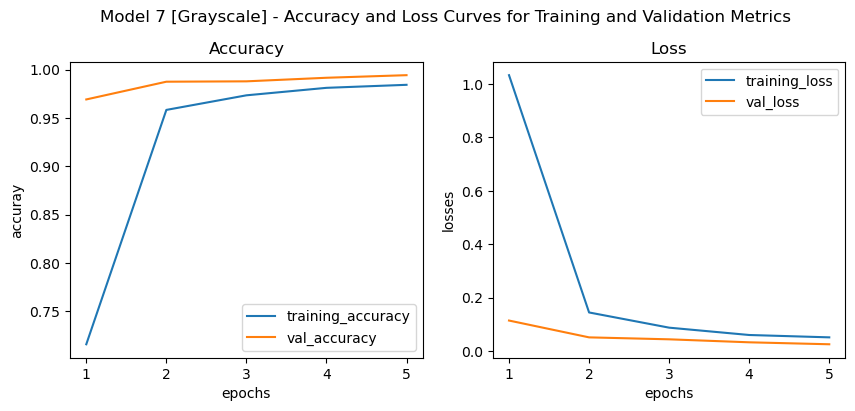

In [93]:
plot_accuracy_loss_curves(history_7_gray, "Model 7 [Grayscale] -")

In [94]:
# Evaluate on the test data
model_7_gray.evaluate(test_eval_data_gray)

395/395 [==============================] - 2s 5ms/step - loss: 0.1543 - accuracy: 0.9653


[0.15432408452033997, 0.9653206467628479]

In [95]:
# Make predictions on test data batch using model 7 and print its prediction metrics
preds_7_gray = get_model_metrics('Model 7 [grayscale images] Metrics:', 
                                 model_7_gray, test_data_gray, actuals, labels)

Model 7 [grayscale images] Metrics:
Accuracy Score: 0.9653206650831354
Precision Score: 0.9527910683014907
Recall Score: 0.9344438482724631
F-1 Score: 0.93815595883954



In [96]:
# Create model 7 with color images
model_7_color = create_compile_model(model_num=7, img_is_color=True)

try:
    # Fit the model
    history_7_color = fit_model(model_7_color,
                                 train_data_color,
                                 val_data_color,
                                 epochs=NUM_EPOCHS,
                                 callbacks=[early_stopping])
except:
    pass

Epoch 1/5
981/981 [==============================] - 17s 16ms/step - loss: 0.8073 - accuracy: 0.7722 - val_loss: 0.0825 - val_accuracy: 0.9786
Epoch 2/5
981/981 [==============================] - 16s 16ms/step - loss: 0.1130 - accuracy: 0.9668 - val_loss: 0.0439 - val_accuracy: 0.9879
Epoch 3/5
981/981 [==============================] - 16s 16ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0297 - val_accuracy: 0.9917
Epoch 4/5
981/981 [==============================] - 16s 17ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0336 - val_accuracy: 0.9902
Epoch 5/5
981/981 [==============================] - 16s 17ms/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0262 - val_accuracy: 0.9913


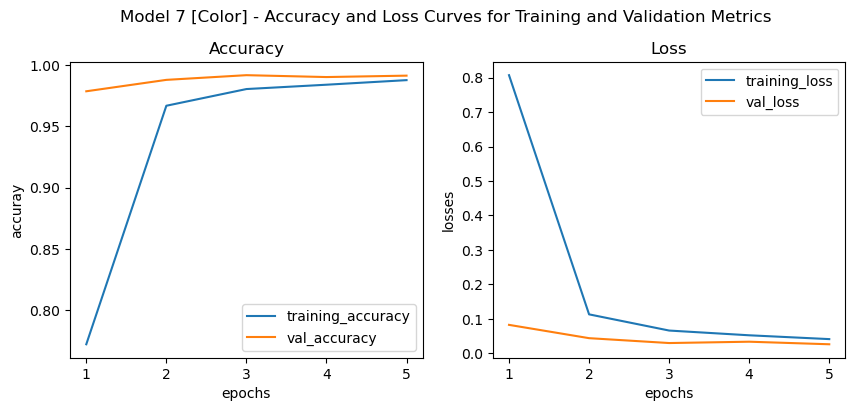

In [97]:
plot_accuracy_loss_curves(history_7_color, "Model 7 [Color] -")

In [98]:
# Evaluate on the test data
model_7_color.evaluate(test_eval_data_color)

395/395 [==============================] - 2s 5ms/step - loss: 0.1873 - accuracy: 0.9585


[0.18727166950702667, 0.958511471748352]

In [99]:
# Make predictions on test data batch using model 7 and print its prediction metrics
preds_7_color = get_model_metrics('Model 7 [color images] Metrics:', 
                                   model_7_color, test_data_color, actuals, labels)

Model 7 [color images] Metrics:
Accuracy Score: 0.9585114806017418
Precision Score: 0.9422156859553164
Recall Score: 0.9316919617382206
F-1 Score: 0.9316505899905099



### Observations for Model 7: 

* The loss and accuracy for the `grayscale` model on the test data is - loss: 0.1542 - accuracy: 0.9630.
* The loss and accuracy for the `color` model on the test data is - loss: 0.1862 - accuracy: 0.9538.
* The `grayscale` model is performing slightly better than the `color` model 
* The `grayscale` model for `Model 7` performs slightly better than `Model 5` and `Model 6`
* The `color` model for `Model 5` and `Model 6` performs slightly better than `Model 7`

**Note:** The difference between `Model 5` and `Model 6` is the number of filters in the second sets of Conv2D layers (2) were reduced from 64 to 32 and the number of filters in the Dense layer after the Flatten layer was changed from 128 to 256.

### <center>Table showing the `Accuracy`, `Precision`, `Recall`, `F-1` scores for `Grayscale` and `Color` models</center>  
    
| Grayscale | Accuracy | Precision |  Recall  | F-1 Score || Color  | Accuracy | Precision |  Recall  | F-1 Score |
|:---------:|:---------|:----------|:---------|:----------||:------:|:---------|:----------|:---------|:----------|
| Model 1  | 0.908947 | 0.884498  | 0.878998 | 0.872202  || Model 1 | 0.914806 | 0.880713  | 0.881620 | 0.869233  |
| Model 2  | 0.926049 | 0.899037  | 0.885781 | 0.884272  || Model 2 | 0.938480 | 0.920816  | 0.908620 | 0.906781  |
| Model 3  | 0.941489 | 0.938267  | 0.904019 | 0.916596  || Modle 3 | 0.949565 | 0.925821  | 0.917706 | 0.916998  | 
| Model 4  | 0.950752 | 0.935220  | 0.924225 | 0.925126  || Model 4 | 0.956215 | 0.943829  | 0.937415 | 0.936780  |
| Model 5  | 0.961045 | 0.952587  | 0.938619 | 0.943757  || Model 5 | 0.956770 | 0.948621  | 0.924000 | 0.931033  |
| Model 6  | 0.955740 | 0.933293  | 0.918009 | 0.919124  || Model 6 | 0.963025 | 0.948008  | 0.942223 | 0.942815  |
| Model 7  | 0.963025 | 0.948446  | 0.935036 | 0.939012  || Model 7 | 0.953840 | 0.939529  | 0.931991 | 0.929867  | 


## Compare the color and grayscale CNN models and analyze which model is better

From the table above, `Model 7` has the highest `accuracy` for `grayscale` models but in comparison with `Model 5`, the the `accuracy` difference is only 0.2%. However, the `precision`, `recall` and `F-1` scores are better for `Model 5` in comparison with `Model 7`.

<font size="3">**Conclusion:** For the `grayscale` CNN model, the model that performs the best is `Model 5`</font>

From the table above, `Model 6` has the highest `accuracy`, `recall` and `F-1` scores.

<font size="3">**Conclusion:** For the `color` CNN model, the model that performs the best is `Model 6`</font>

## Determine if the model's classes are good

Using Scikit-Learn `classification_report`, it show that the following classes for the best `grayscale` and `color` models have F-1 score lesser than 90% which have more chances of making wrong predictions for these `traffic signs`.

**Model 5 Grayscale Model**  
Class 6 [`End of speed limit (80km/h)`] has F-1 score 0.8930  
Class 21 [`Double curve`] has F-1 score 0.8889  
Class 26 [`Traffic signals`] has F-1 score 0.8604  
Class 27 [`Pedestrians`] has F-1 score 0.6239  
Class 30 [`Beware of ice/snow`] has F-1 score 0.8165  
Class 40 [`Roundabout mandatory`] has F-1 score 0.8736  
Class 41 [`End of no passing`] has F-1 score 0.7879  

**Model 6 Color Model**  
Class 18 [`General caution`] has F-1 score 0.8864  
Class 20 [`Dangerous curve right`] has F-1 score 0.8867  
Class 21 [`Double curve`] has F-1 score 0.8324  
Class 26 [`Traffic signals`] has F-1 score 0.8472  
Class 27 [`Pedestrians`] has F-1 score 0.6230  
Class 30 [`Beware of ice/snow`] has F-1 score 0.8938  
Class 37 [`Go straight or left`] has F-1 score 0.8741  
Class 40 [`Roundabout mandatory`] has F-1 score 0.8820  
Class 41 [`End of no passing`] has F-1 score 0.8119  

In [100]:
from sklearn.metrics import classification_report

# Function to print a formatted classification_report
def print_classification_report(report):
    """
    Format and print the metrics in Scikit-Learn classification_report
    """
    for i in range(43):
        metrics = report.get(str(i))
        prec = metrics.get('precision')
        recall = metrics.get('recall')
        f1 = metrics.get('f1-score')
        supp = metrics.get('support')
        
        if i < 10:
            print(f"class  {i}:", end="")
        else:
            print(f"class {i}:", end="")
              
        
        print(f"[precision: {prec:.2f}] [recall: {recall:.2f}] [f1-score: {f1:.2f}] [support: {supp}]")

        
# Function to print the classes that have lesser than the specified F-1 score percentage
def print_class_metrics(report, f1_percent):
    """
    Print the list of classes that have F-1 score less than specified percentage.
    """
    # Check if the F-1 score for any of the 43 classes are less than f1_percent
    for i in range(43):
        metrics = report.get(str(i))
        f1 = metrics.get('f1-score')
        
        # Print and save any classes less than f1_percent
        if  f1 < f1_percent: 
            print(f"Class {i} [{classname[i]}] has F-1 score {f1:.4f}")
                  
        
# Get the classification_report for Model 5 (grayscale)
model_5_report = classification_report(actuals, preds_5_gray, output_dict=True)

print("Classification Report Metrics for Model 5 (grayscale model):\n")
print_class_metrics(model_5_report, 0.9)
print()
print_classification_report(model_5_report)


Classification Report Metrics for Model 5 (grayscale model):

Class 21 [Double curve] has F-1 score 0.7778
Class 24 [Road narrows on the right] has F-1 score 0.8817
Class 26 [Traffic signals] has F-1 score 0.8889
Class 27 [Pedestrians] has F-1 score 0.5825
Class 29 [Bicycles crossing] has F-1 score 0.8984
Class 30 [Beware of ice/snow] has F-1 score 0.7832
Class 40 [Roundabout mandatory] has F-1 score 0.7784
Class 41 [End of no passing] has F-1 score 0.6667

class  0:[precision: 1.00] [recall: 0.92] [f1-score: 0.96] [support: 60]
class  1:[precision: 0.97] [recall: 0.99] [f1-score: 0.98] [support: 720]
class  2:[precision: 0.94] [recall: 0.99] [f1-score: 0.96] [support: 750]
class  3:[precision: 0.99] [recall: 0.95] [f1-score: 0.97] [support: 450]
class  4:[precision: 0.97] [recall: 0.98] [f1-score: 0.97] [support: 660]
class  5:[precision: 0.95] [recall: 0.94] [f1-score: 0.95] [support: 630]
class  6:[precision: 1.00] [recall: 0.90] [f1-score: 0.95] [support: 150]
class  7:[precision: 

In [101]:
# Get the classification_report for Model 6 (color)
model_6_report = classification_report(actuals, preds_6_color, output_dict=True)

print("Classification Report Metrics for Model 6 (color model):\n")
print_class_metrics(model_6_report, 0.9)
print()
print_classification_report(model_6_report)


Classification Report Metrics for Model 6 (color model):

Class 18 [General caution] has F-1 score 0.8914
Class 20 [Dangerous curve right] has F-1 score 0.8654
Class 21 [Double curve] has F-1 score 0.8696
Class 24 [Road narrows on the right] has F-1 score 0.7738
Class 27 [Pedestrians] has F-1 score 0.7925
Class 29 [Bicycles crossing] has F-1 score 0.8093
Class 30 [Beware of ice/snow] has F-1 score 0.7812
Class 32 [End speed + passing limits] has F-1 score 0.8824

class  0:[precision: 0.97] [recall: 1.00] [f1-score: 0.98] [support: 60]
class  1:[precision: 0.93] [recall: 0.98] [f1-score: 0.96] [support: 720]
class  2:[precision: 0.99] [recall: 0.97] [f1-score: 0.98] [support: 750]
class  3:[precision: 0.93] [recall: 0.97] [f1-score: 0.95] [support: 450]
class  4:[precision: 0.97] [recall: 0.97] [f1-score: 0.97] [support: 660]
class  5:[precision: 0.94] [recall: 0.96] [f1-score: 0.95] [support: 630]
class  6:[precision: 1.00] [recall: 0.85] [f1-score: 0.92] [support: 150]
class  7:[preci

## Predict and display traffic signs in the test dataset

Below are 2 functions that predicts and display an image in the test_data (that can compare with its label).

1. The `pred_and_plot` function takes in an image array and the model specified to determine if the model can predict correctly the `traffic sign` class for the image.


2. The `predict_and_plot_random_images` function takes in the specified model and the dataset of images and randomly select the first image from the dataset to start predicting the label for that image and the subsequent 5 images following the first image.
   
    * The image used for the prediction is plotted with its predicted (Pred) label and prediction probability, and is compared to the expected (True) label for that image. 
        * If the prediction is incorrect, the text will be shown in `Red`.
        * If the prediction is correct, the text will be shown in `Green`.


In [102]:
# Function to predict and plot specified image (array) using the specified model
def pred_and_plot(model, image, class_names=classname, is_color=True):
    """
    Import an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Make a prediction
    pred = model.predict(tf.expand_dims(image, axis=0))
    
    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.figure(figsize=(2, 2))
    
    if is_color:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
        
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

### Predict and plot an image from the `test_data` with the specified model

Actual Traffic Sign: Right-of-way at the intersection
1/1 [==============================] - 0s 37ms/step


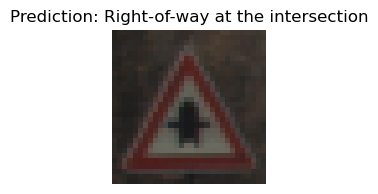

In [103]:
# Example: get image from test_data['color_img_arr'] column for 'ClassId' 11 (row 4 in test_data)

print("Actual Traffic Sign:", classname[test_data['ClassId'][4]])
pred_and_plot(model_6_color, test_data['color_img_arr'][4])

Actual Traffic Sign: Keep right
1/1 [==============================] - 0s 36ms/step


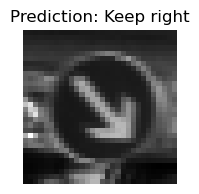

In [104]:
# Get the row 2 image using Model 5 grayscale prediction from the test_data to check if it is correct

print("Actual Traffic Sign:", classname[test_data['ClassId'][2]])
pred_and_plot(model_5_gray, test_data['grayscale_img_arr'][2], is_color=False)

In [105]:
import random

# Function to randomly predict and plot 6 images using the specified model and images
def predict_and_plot_random_images(model, images, true_labels, classes, is_color=True):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    r = random.randint(0, len(images))
    
    # Set figure size for plot
    plt.figure(figsize=(9.8, 9.8))

    # Show 6 images (3 images per row in 2 rows)
    for i in range(6):
        # Create predictions and targets
        target_image = images[i+r]  # 6 images starting starting from random number r image
        pred_probs = model.predict(tf.expand_dims(target_image, axis=0), verbose=0)
        
        # Get numerical prediction value depending on whether class
        # was using one-hot encoded or numerical value in modeling
        if len(pred_probs[0]) > 1:
            pred_label = pred_probs.argmax()
        else:
            pred_label = int(tf.round(pred_probs[0]))

        # True Label (numerical)
        true_label = true_labels[i+r]
    
        # Class name for prediction and true label
        pred_label_name=classes[pred_label]
        true_label_name=classes[true_label]
        
        # Specify the subplot to show image in
        plt.subplot(3, 3, i+1)
        plt.tight_layout(h_pad=1.0)
        
        # Plot the image with xticks and yticks set to blank
        if is_color:
            plt.imshow(target_image)
        else:
            plt.imshow(target_image, cmap='gray')
        plt.xticks([])
        plt.yticks([])

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% \n(True: {})".format(pred_label_name,
                                                           100*tf.reduce_max(pred_probs),
                                                           true_label_name),
                   color=color) # set the color to green or red based on if prediction is right or wrong


In [106]:
# Get the classification_report for Model 1 (color)
model_1_report = classification_report(actuals, preds_1_color, output_dict=True)

print("Following classes for Model 1 have more chances of wrong predictions: ")
print_class_metrics(model_1_report, 0.9)


Following classes for Model 1 have more chances of wrong predictions: 
Class 0 [Speed limit (20km/h)] has F-1 score 0.6250
Class 5 [Speed limit (80km/h)] has F-1 score 0.8272
Class 6 [End of speed limit (80km/h)] has F-1 score 0.8047
Class 7 [Speed limit (100km/h)] has F-1 score 0.8446
Class 8 [Speed limit (120km/h)] has F-1 score 0.8803
Class 17 [No entry] has F-1 score 0.8177
Class 18 [General caution] has F-1 score 0.8852
Class 19 [Dangerous curve left] has F-1 score 0.8511
Class 20 [Dangerous curve right] has F-1 score 0.8396
Class 21 [Double curve] has F-1 score 0.6829
Class 22 [Bumpy road] has F-1 score 0.8797
Class 23 [Slippery road] has F-1 score 0.8532
Class 24 [Road narrows on the right] has F-1 score 0.6977
Class 26 [Traffic signals] has F-1 score 0.8710
Class 27 [Pedestrians] has F-1 score 0.6263
Class 28 [Children crossing] has F-1 score 0.7684
Class 29 [Bicycles crossing] has F-1 score 0.8808
Class 30 [Beware of ice/snow] has F-1 score 0.6768
Class 41 [End of no passing] 

### Randomly predict and plot images with the specified model and array of images from the `test_data`

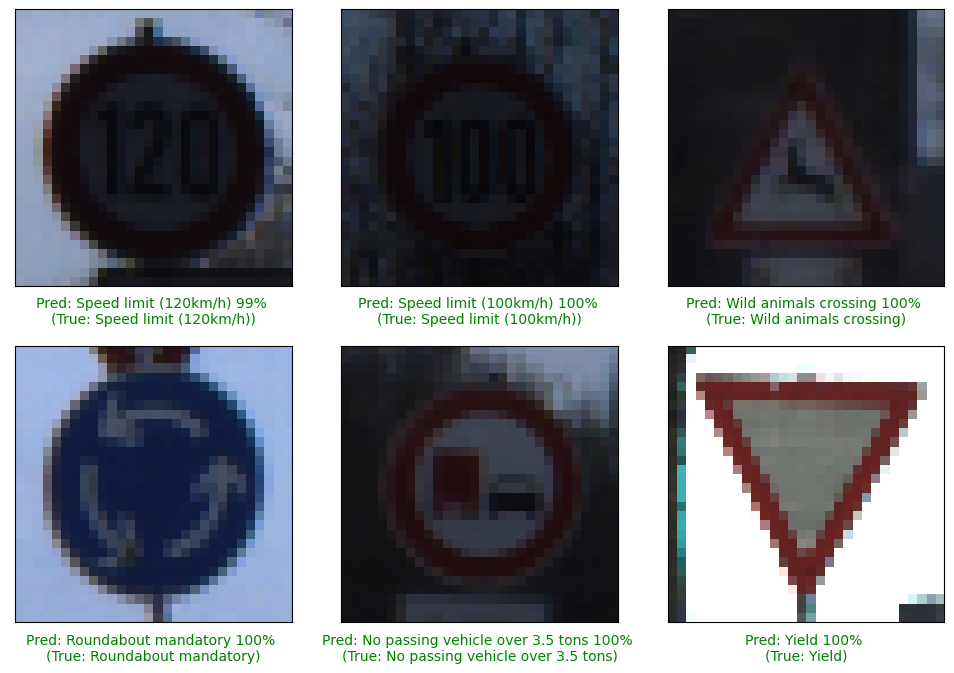

In [107]:
predict_and_plot_random_images(model=model_1_color,
                               images=test_data['color_img_arr'], 
                               true_labels=test_data['ClassId'], 
                               classes=classname)

In [108]:
# Get the classification_report for Model 2 (grayscale)
model_2_report = classification_report(actuals, preds_2_gray, output_dict=True)

print("Following classes for Model 2 have more chances of wrong predictions: ")
print_class_metrics(model_2_report, 0.9)

Following classes for Model 2 have more chances of wrong predictions: 
Class 0 [Speed limit (20km/h)] has F-1 score 0.8190
Class 6 [End of speed limit (80km/h)] has F-1 score 0.8791
Class 11 [Right-of-way at the intersection] has F-1 score 0.8664
Class 18 [General caution] has F-1 score 0.8799
Class 20 [Dangerous curve right] has F-1 score 0.8923
Class 21 [Double curve] has F-1 score 0.7956
Class 23 [Slippery road] has F-1 score 0.8889
Class 26 [Traffic signals] has F-1 score 0.8772
Class 27 [Pedestrians] has F-1 score 0.5000
Class 30 [Beware of ice/snow] has F-1 score 0.8374
Class 32 [End speed + passing limits] has F-1 score 0.7843
Class 39 [Keep left] has F-1 score 0.8795
Class 41 [End of no passing] has F-1 score 0.8000


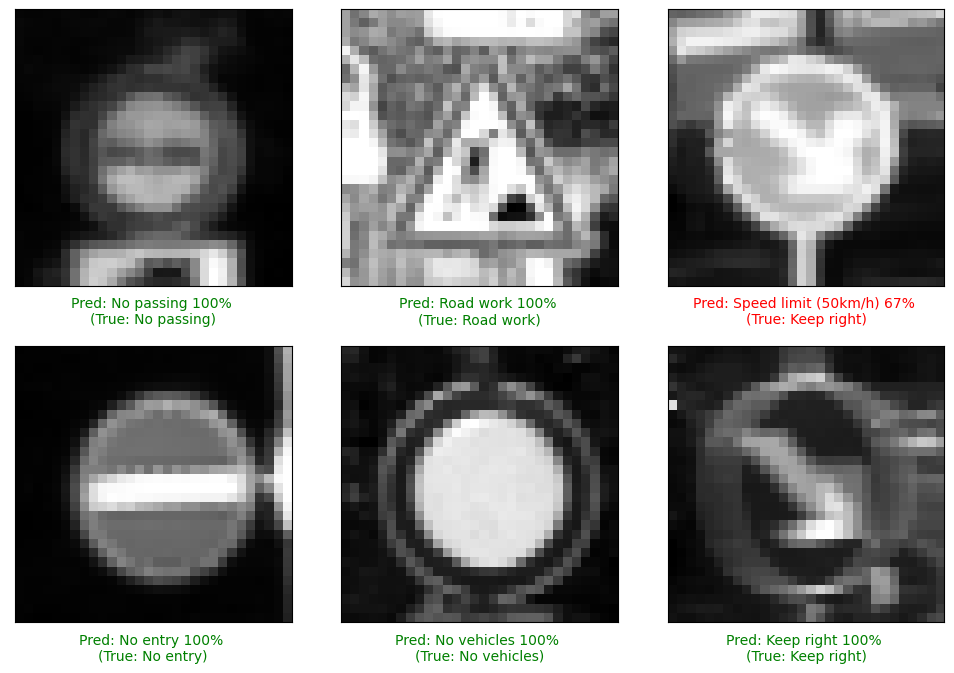

In [109]:
predict_and_plot_random_images(model=model_1_gray, 
                               images=test_data['grayscale_img_arr'], 
                               true_labels=test_data['ClassId'], 
                               classes=classname, is_color=False)

<center>End of Project</center>